In [1]:
import glob
from tqdm import tqdm
import uproot
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams.update({"figure.facecolor": (1,1,1,0)})
import yahist
import mplhep as hep
plt.style.use(hep.style.CMS)

from scipy.optimize import curve_fit

BLIND = False

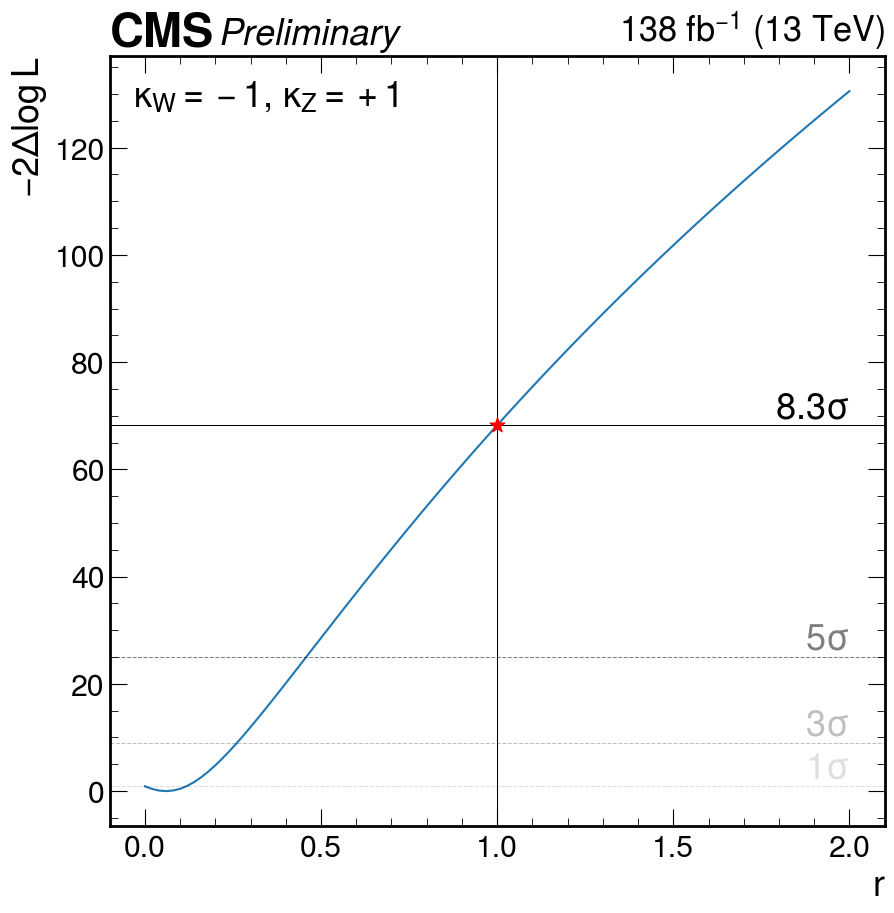

In [2]:
if BLIND:
    result_1D = "../combine/vbswh/limits/higgsCombine_vbswh.MultiDimFit.mH125.root"
else:
    result_1D = "../combine/vbswh/limits/higgsCombine_vbswh_unblinded.MultiDimFit.mH125.root"

with uproot.open(result_1D) as f:
    points = f.get("limit").arrays(["r", "deltaNLL"], library="np")
    points["deltaNLL"] *= 2
    
r_argsort = np.argsort(points["r"])
points["r"] = points["r"][r_argsort]
points["deltaNLL"] = points["deltaNLL"][r_argsort]

# Plot original curve
fig, axes = plt.subplots()
nans = np.isnan(points["deltaNLL"])
axes.plot(points["r"][~nans], points["deltaNLL"][~nans], label="HiggsCombine")

x_high = axes.get_xticks()[-2]
deltaNLL_r_eq_1 = points["deltaNLL"][np.where(points["r"] == 1)[0][0]]

axes.axvline(x=1, color="k", linewidth=0.75)
axes.axhline(y=deltaNLL_r_eq_1, color="k", linewidth=0.75)
axes.scatter(1, deltaNLL_r_eq_1, marker="*", color="r", s=121, zorder=999)
result = r"$X \sigma$".replace("X", f"{np.sqrt(deltaNLL_r_eq_1):.1f}")
axes.text(x_high, deltaNLL_r_eq_1, result, ha="right", va="bottom")

axes.axhline(y=25, color="k", linestyle="--", alpha=0.5, linewidth=0.75)
axes.text(x_high, 25, r"$5 \sigma$", ha="right", va="bottom", alpha=0.5)

axes.axhline(y=9,  color="k", linestyle="--", alpha=0.25, linewidth=0.75)
axes.text(x_high, 9, r"$3 \sigma$", ha="right", va="bottom", alpha=0.25)

axes.axhline(y=1,  color="k", linestyle="--", alpha=0.125, linewidth=0.75)
axes.text(x_high, 1, r"$1 \sigma$", ha="right", va="bottom", alpha=0.125)

axes.set_xlabel("r")
axes.set_ylabel(r"$-2\Delta\log{L}$")

# Add kW and kZ label
axes.text(
    0.03, 0.97,
    r"$\kappa_W = -1$, $\kappa_Z = +1$",
    ha="left", va="top",
    transform = axes.transAxes
)
# Add CMS label
hep.cms.label(
    "Preliminary",
    data=(not BLIND),
    lumi=138,
    loc=0,
    ax=axes
);

if BLIND:
    plt.savefig("/home/users/jguiang/public_html/vbswh_plots/limits/r_vs_m2deltaLogL.pdf", bbox_inches="tight")
else:
    plt.savefig("/home/users/jguiang/public_html/vbswh_plots/limits/r_vs_m2deltaLogL_unblinded.pdf", bbox_inches="tight")

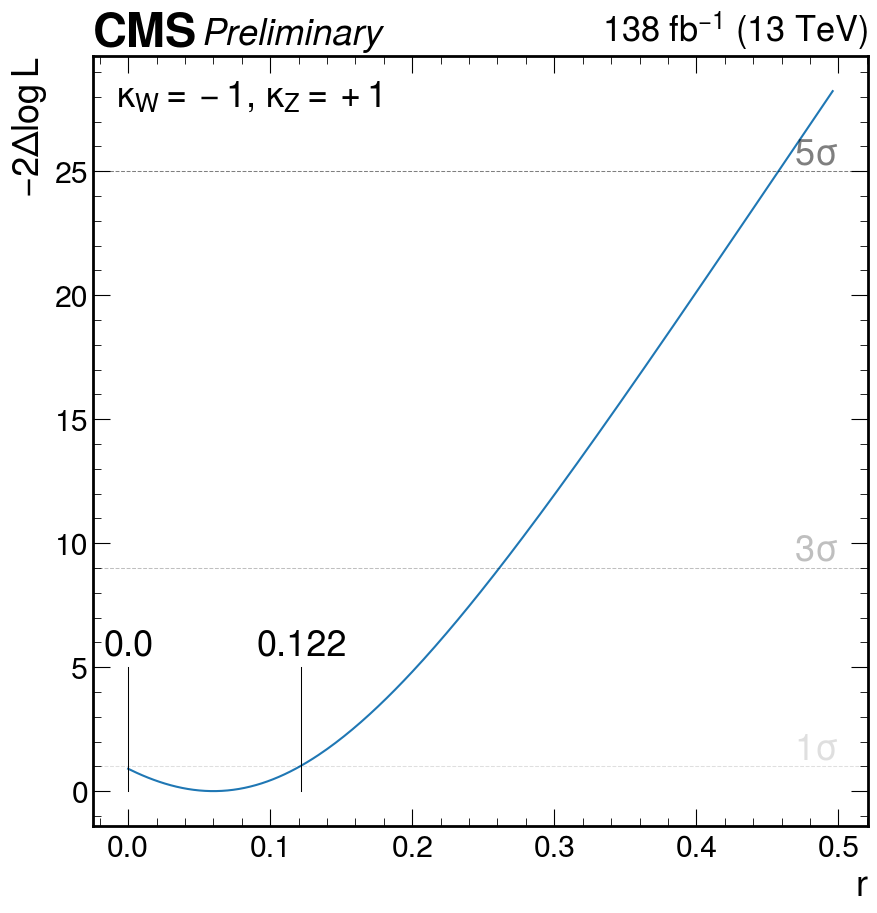

In [3]:
if not BLIND:
    result_1D = "../combine/vbswh/limits/higgsCombine_vbswh_unblinded_coarse.MultiDimFit.mH125.root"

    with uproot.open(result_1D) as f:
        points = f.get("limit").arrays(["r", "deltaNLL"], library="np")
        points["deltaNLL"] *= 2


    r_argsort = np.argsort(points["r"])
    points["r"] = points["r"][r_argsort]
    points["deltaNLL"] = points["deltaNLL"][r_argsort]

    points["r"] = points["r"][:250]
    points["deltaNLL"] = points["deltaNLL"][:250]

    # Plot original curve
    fig, axes = plt.subplots()
    nans = np.isnan(points["deltaNLL"])
    axes.plot(points["r"][~nans], points["deltaNLL"][~nans], label="HiggsCombine")

    x_high = axes.get_xticks()[-2]

    l_one_sigma_x = points["r"][points["deltaNLL"] <= 1][0]
    l_one_sigma_y = points["deltaNLL"][points["deltaNLL"] <= 1][0]

    r_one_sigma_x = points["r"][points["deltaNLL"] >= 1][0]
    r_one_sigma_y = points["deltaNLL"][points["deltaNLL"] >= 1][0]

    axes.plot([l_one_sigma_x, l_one_sigma_x], [0, 5], color="k", linewidth=0.75)
    axes.plot([r_one_sigma_x, r_one_sigma_x], [0, 5], color="k", linewidth=0.75)
    axes.text(l_one_sigma_x, 5.5, l_one_sigma_x, ha="center")
    axes.text(r_one_sigma_x, 5.5, r_one_sigma_x, ha="center")

    axes.axhline(y=25, color="k", linestyle="--", alpha=0.5, linewidth=0.75)
    axes.text(x_high, 25, r"$5 \sigma$", ha="right", va="bottom", alpha=0.5)

    axes.axhline(y=9,  color="k", linestyle="--", alpha=0.25, linewidth=0.75)
    axes.text(x_high, 9, r"$3 \sigma$", ha="right", va="bottom", alpha=0.25)

    axes.axhline(y=1,  color="k", linestyle="--", alpha=0.125, linewidth=0.75)
    axes.text(x_high, 1, r"$1 \sigma$", ha="right", va="bottom", alpha=0.125)

    axes.set_xlabel("r")
    axes.set_ylabel(r"$-2\Delta\log{L}$")

    # Add kW and kZ label
    axes.text(
        0.03, 0.97,
        r"$\kappa_W = -1$, $\kappa_Z = +1$",
        ha="left", va="top",
        transform = axes.transAxes
    )
    # Add CMS label
    hep.cms.label(
        "Preliminary",
        data=(not BLIND),
        lumi=138,
        loc=0,
        ax=axes
    );

    plt.savefig("/home/users/jguiang/public_html/vbswh_plots/limits/r_vs_m2deltaLogL_unblinded_zoom.pdf", bbox_inches="tight")

In [4]:
def get_2D_results(results_2D_globber, blind=False):
    results_2D = glob.glob(results_2D_globber)
    r_eq_1_sigmas = []
    kW_points = []
    kZ_points = []
    kW_spec_points = []
    kZ_spec_points = []
    for combine_root_file in tqdm(results_2D):
        with uproot.open(combine_root_file) as f:
            points = f.get("limit").arrays(["r", "deltaNLL"], library="np")
            points["deltaNLL"] *= 2

        scan_name = combine_root_file.split("/")[-1].replace("m", "-").replace("p", ".").replace(".root", "")
        kW_points.append(float(scan_name.split("_")[2]))
        kZ_points.append(float(scan_name.split("_")[4]))

        r_eq_1_indices = np.where(points["r"] == 1)[0]
        if r_eq_1_indices.size == 0 or np.isnan(points["deltaNLL"][r_eq_1_indices[0]]):
            # Find largest exclusion value (ignore NaNs)
            max_excl_sigma_idx = np.nanargmax(points["deltaNLL"])
            max_excl_sigma = np.sqrt(points["deltaNLL"][max_excl_sigma_idx])
            if max_excl_sigma >= 2 and points["r"][max_excl_sigma_idx] < 1:
                # If the max exclusion is >= 2sigma and the corresponding r-value is less than one, then
                # the r-value of 1 is certainly excluded at some large value

                # Plot original curve
                fig, axes = plt.subplots()
                nans = np.isnan(points["deltaNLL"])
                axes.plot(points["r"][~nans], points["deltaNLL"][~nans], label="HiggsCombine")
                # Fit last 10 points to a log
                curve = lambda x, A, B, C: A*np.log(x + B) + C
                opt_params, _ = curve_fit(curve, points["r"][~nans][-10:], points["deltaNLL"][~nans][-10:])
                # Plot best fit
                A, B, C = opt_params
                axes.plot(
                    np.linspace(0, 1.5, 31), 
                    [curve(x, *opt_params) for x in np.linspace(0, 1.5, 31)], 
                    color="k", alpha=0.25,
                    label=(r"$A\log{(r B)} C$".replace("A", f"{A:0.1f}")
                                              .replace("B", f"{B:+0.2f}")
                                              .replace("C", f"{C:+0.1f}"))
                )
                # Plot best fit value at r = 1
                axes.scatter(
                    1, curve(1, *opt_params), 
                    marker="*", color="r", s=96, zorder=100, 
                    label=r"inferred $r = 1$"
                )
                axes.set_xlabel("r");
                axes.set_ylabel(r"$-2\Delta\log{L}$");

                # Take best fit value at r = 1 as exclusion sigma
                r_eq_1_sigmas.append(np.sqrt(curve(1, *opt_params)))

                # Add kW and kZ label
                axes.text(
                    0.03, 0.97,
                    (r"$\kappa_W = KW$, $\kappa_Z = KZ$".replace("KW", f"{kW_points[-1]:.1f}")
                                                        .replace("KZ", f"{kZ_points[-1]:.1f}")),
                    ha="left", va="top",
                    transform = axes.transAxes
                )
                # Add CMS label
                hep.cms.label(
                    "Preliminary",
                    data=(not BLIND),
                    lumi=138,
                    loc=0,
                    ax=axes
                );
                axes.legend(loc="lower right");

                if BLIND:
                    plt.savefig(
                        f"/home/users/jguiang/public_html/vbswh_plots/limits/"
                        + combine_root_file.split("/")[-1].replace(".root", ".pdf"),
                        bbox_inches="tight"
                    )
                else:
                    plt.savefig(
                        f"/home/users/jguiang/public_html/vbswh_plots/limits/"
                        + combine_root_file.split("/")[-1].replace(".root", "_unblinded.pdf"),
                        bbox_inches="tight"
                    )

                kW_spec_points.append(kW_points[-1])
                kZ_spec_points.append(kZ_points[-1])
            else:
                # Otherwise, we are in trouble; let's diagnose!
                print(combine_root_file)
                print("Uh oh!")
                print(points["deltaNLL"][np.nanargmax(points["deltaNLL"])])
                print(points["r"])
                print(np.sqrt(points["deltaNLL"]))
                fig, axes = plt.subplots()
                axes.plot(points["r"], points["deltaNLL"])
                break
        else:
            r_eq_1_sigmas.append(np.sqrt(points["deltaNLL"][r_eq_1_indices[0]]))

    r_eq_1_sigmas = np.clip(np.array(r_eq_1_sigmas), 0, 10000)
    kW_points = np.array(kW_points)
    kZ_points = np.array(kZ_points)
    
    return r_eq_1_sigmas, kW_points, kZ_points, (kW_spec_points, kZ_spec_points)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 625/625 [00:16<00:00, 37.58it/s]


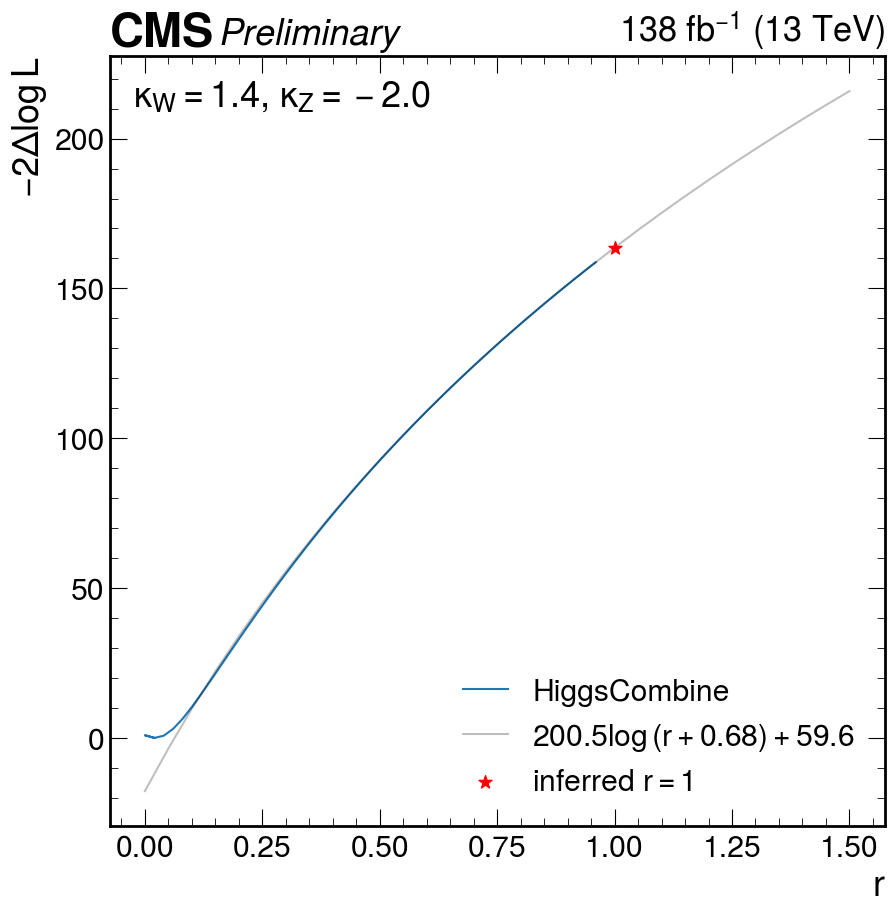

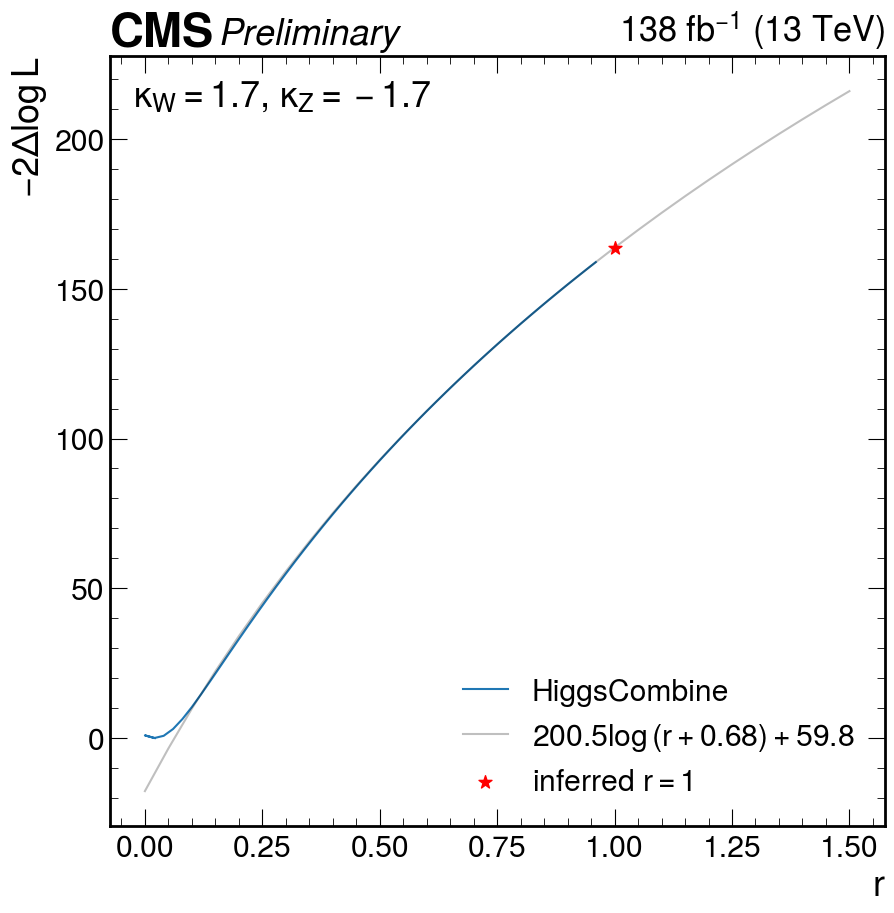

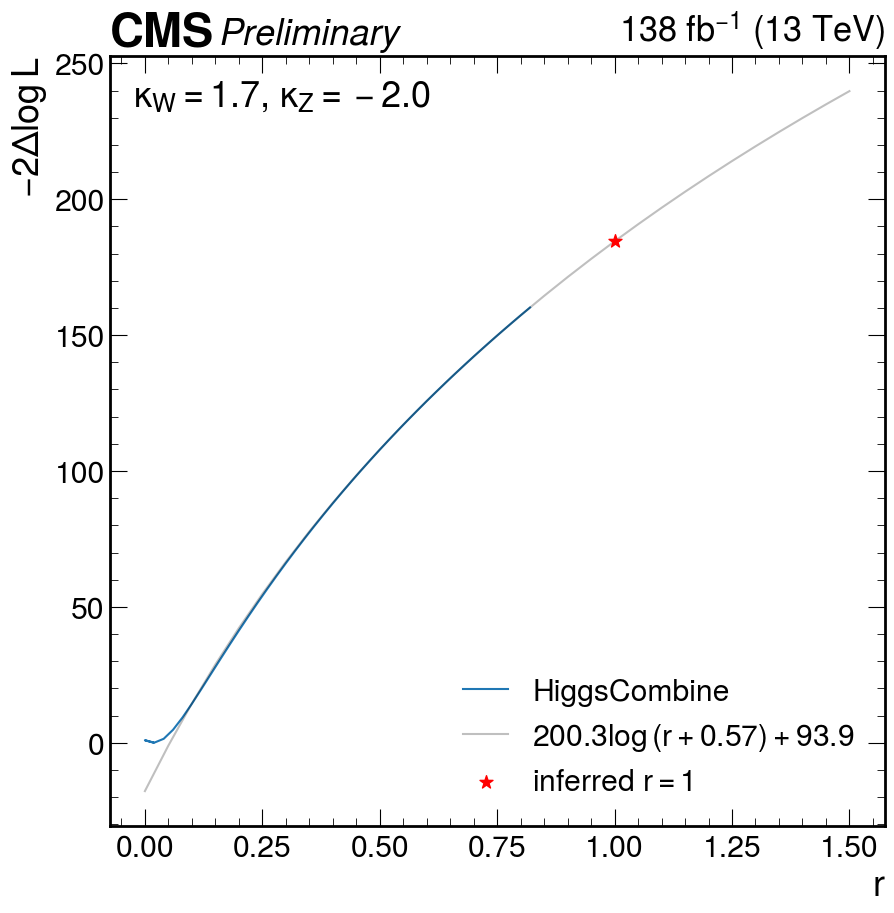

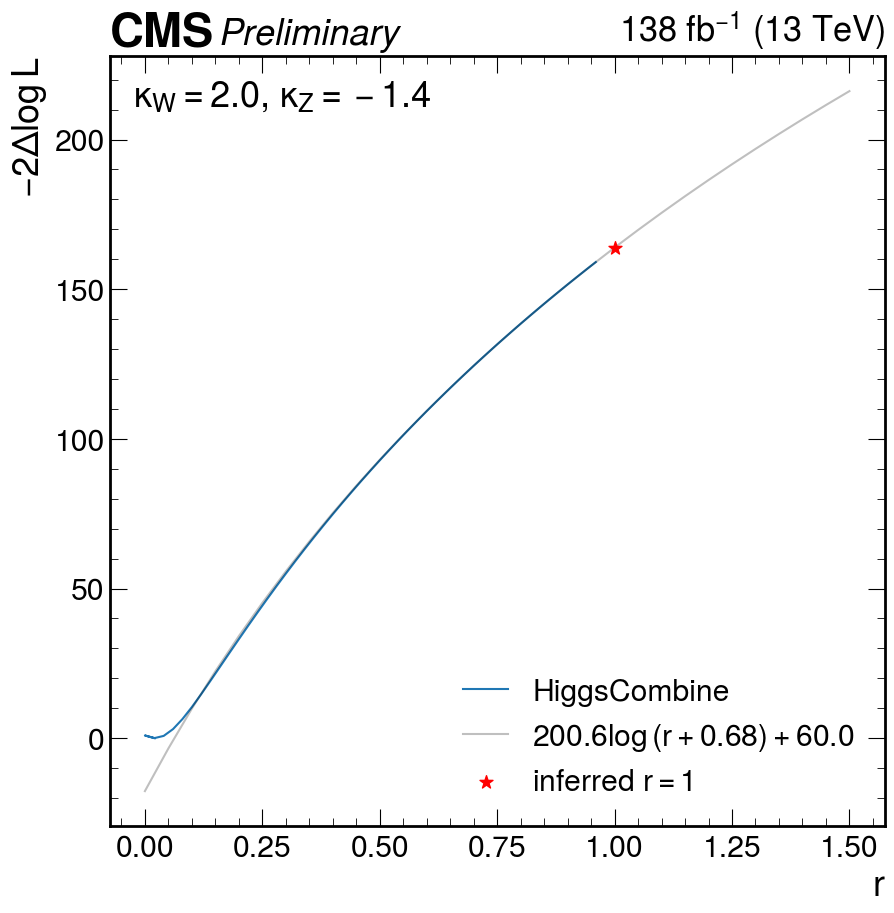

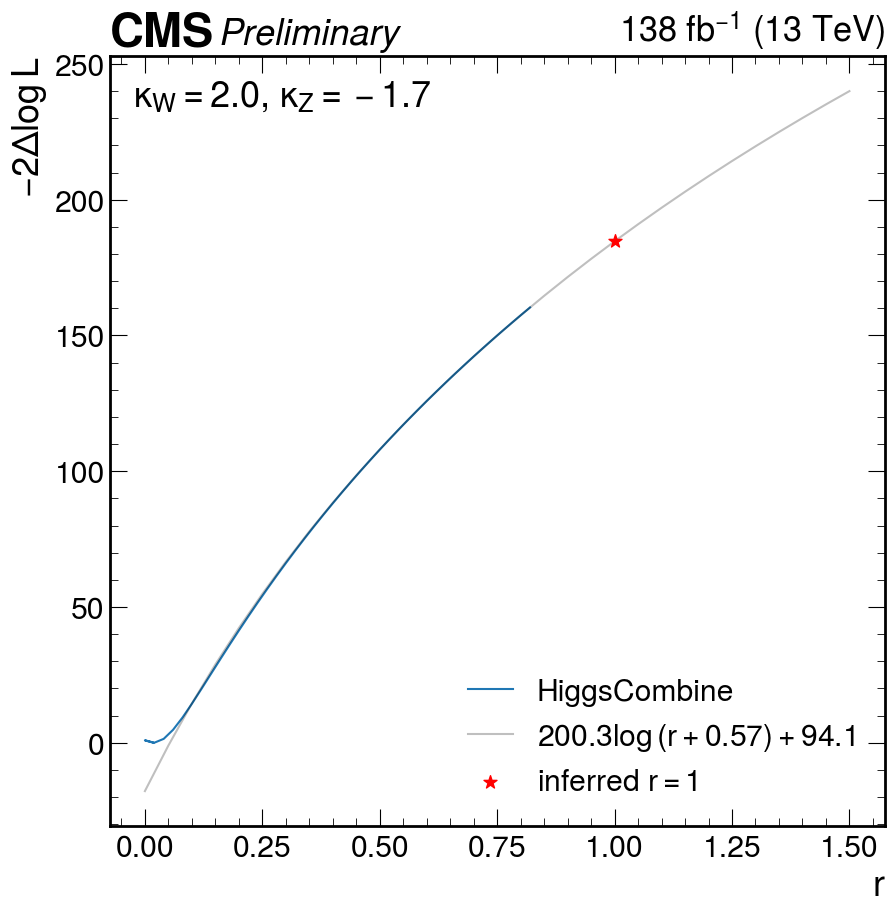

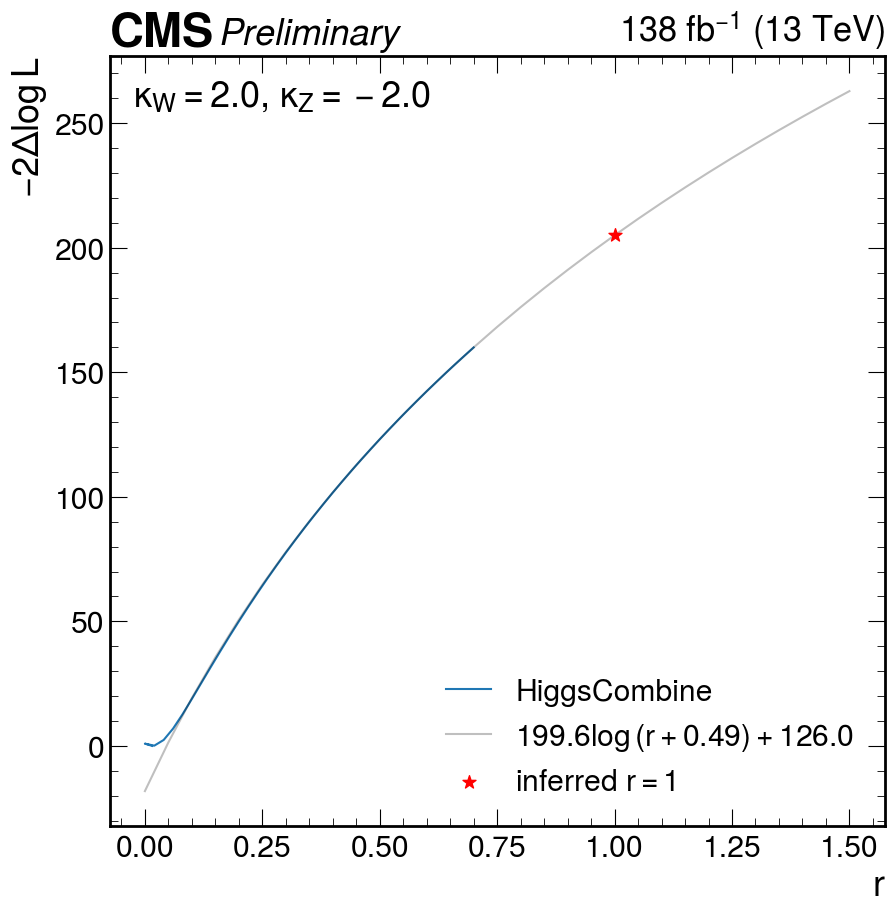

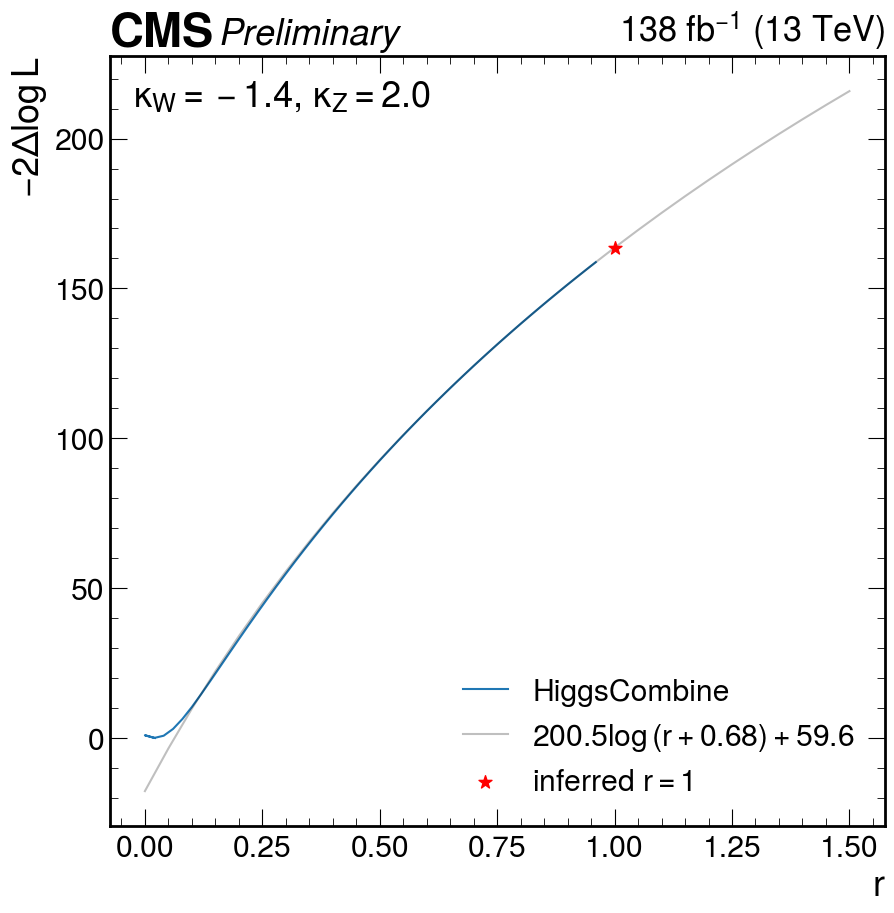

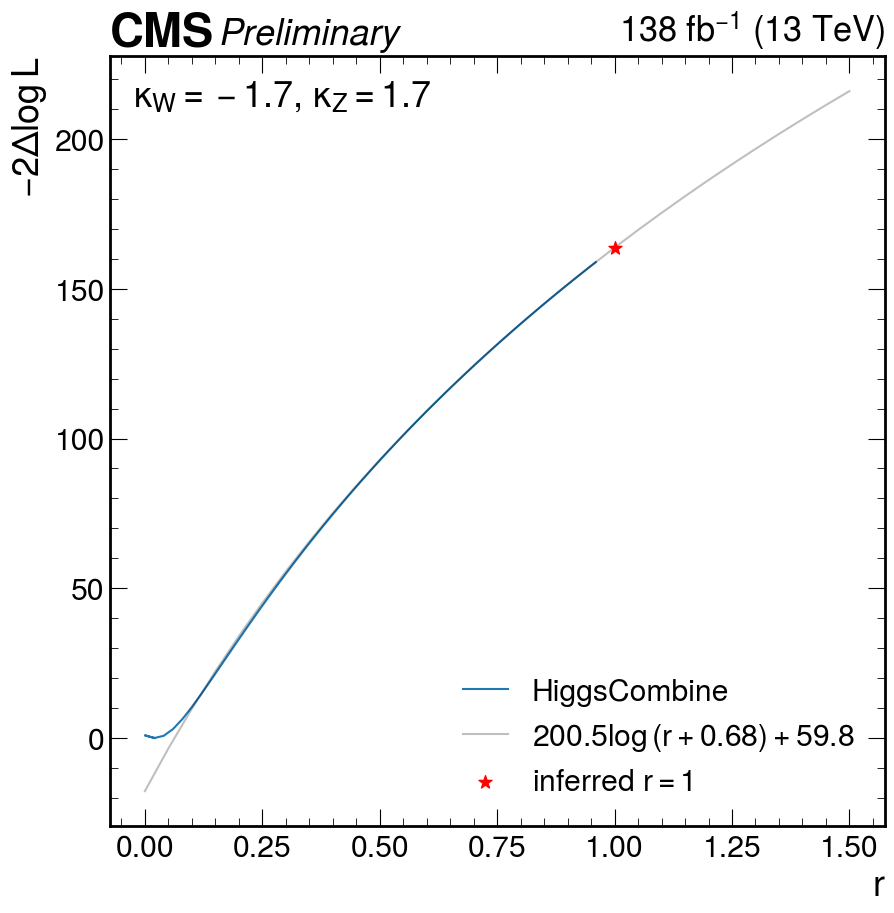

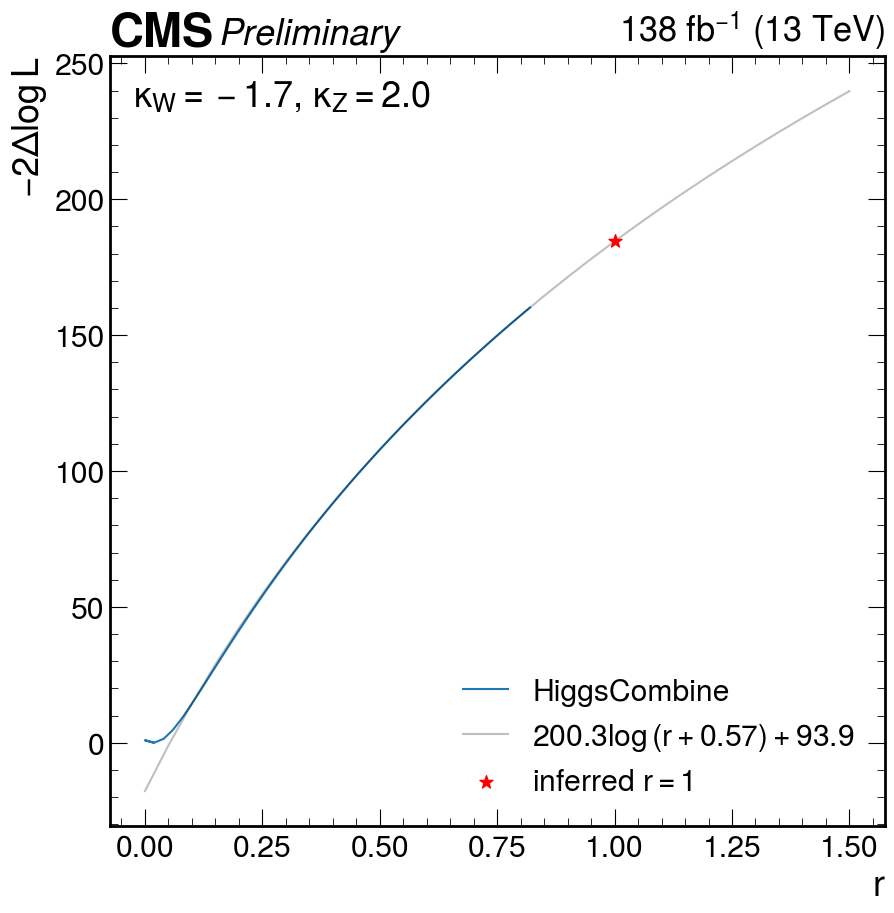

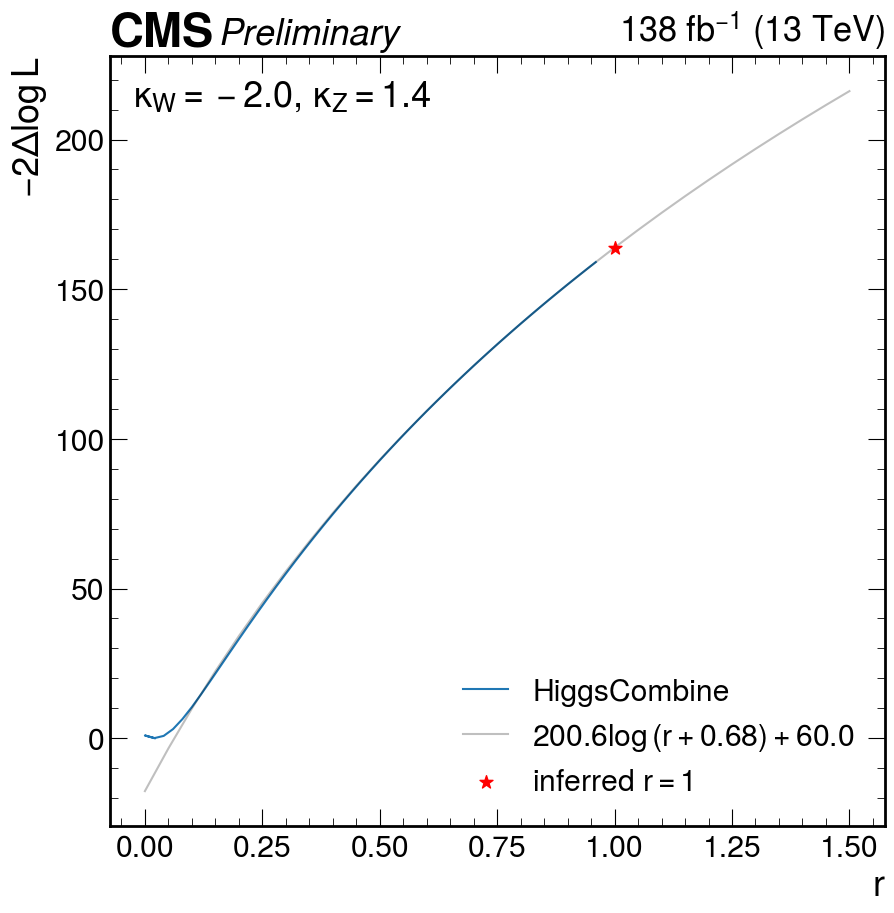

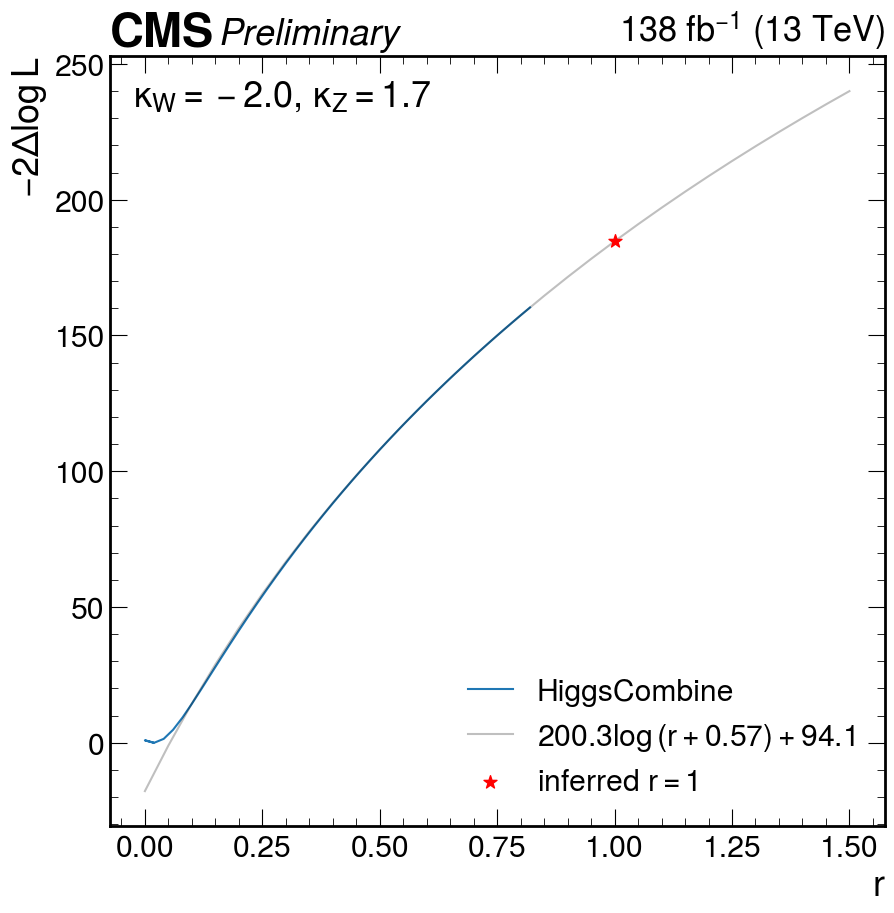

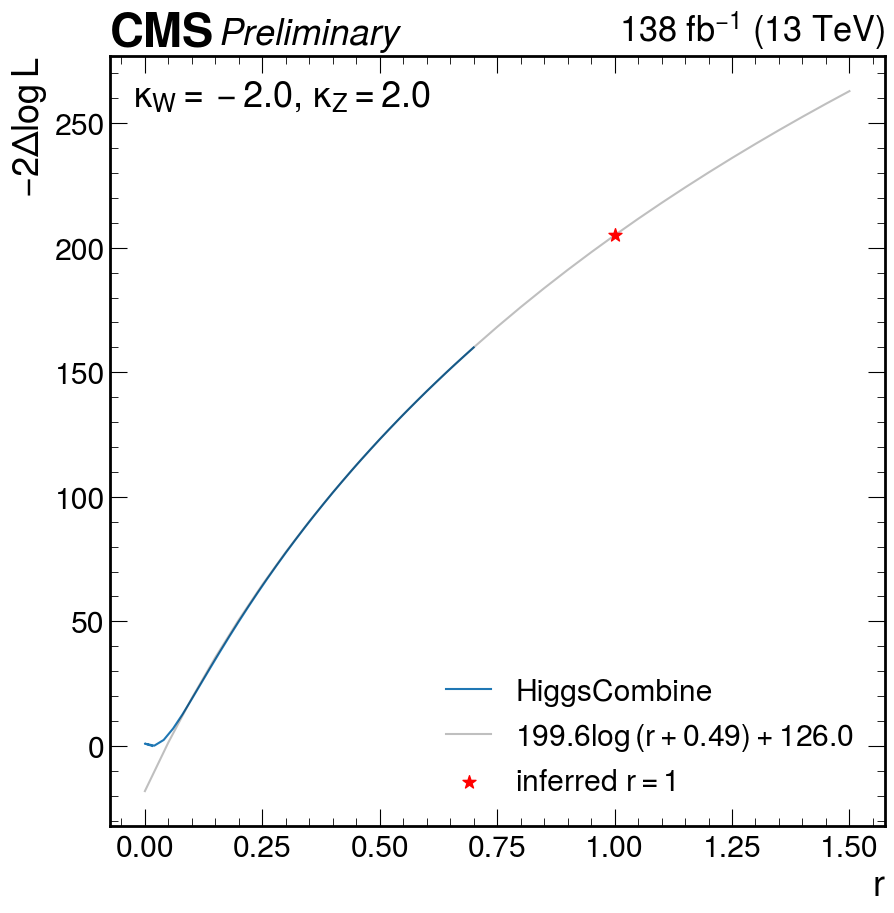

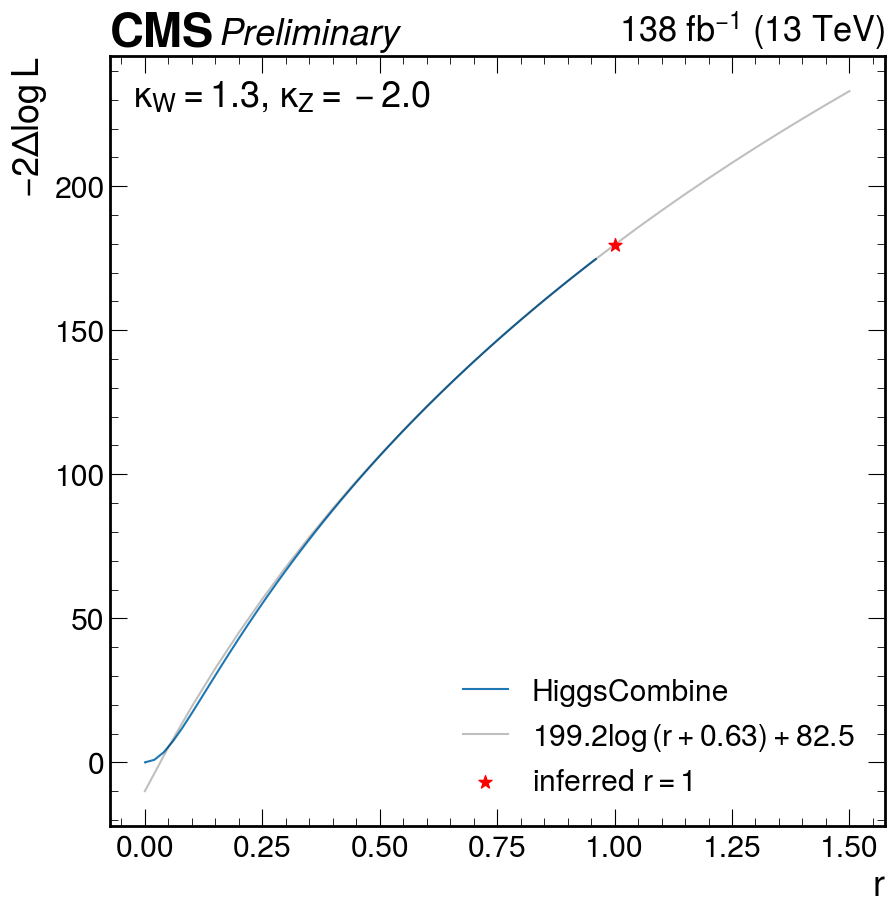

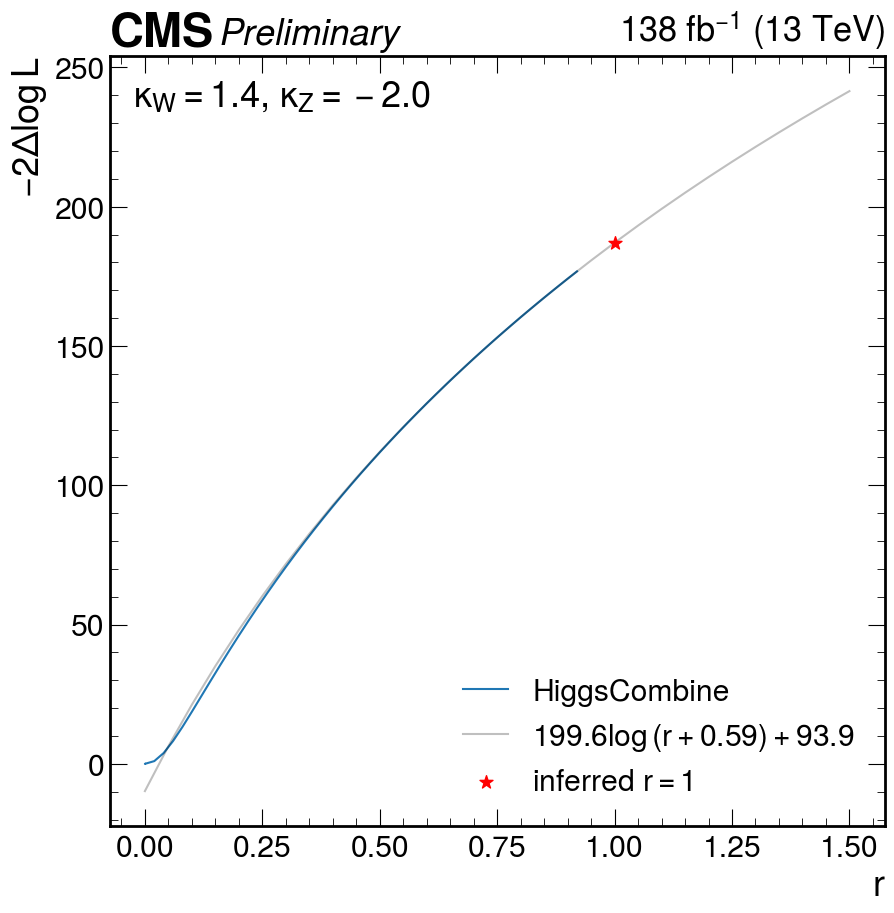

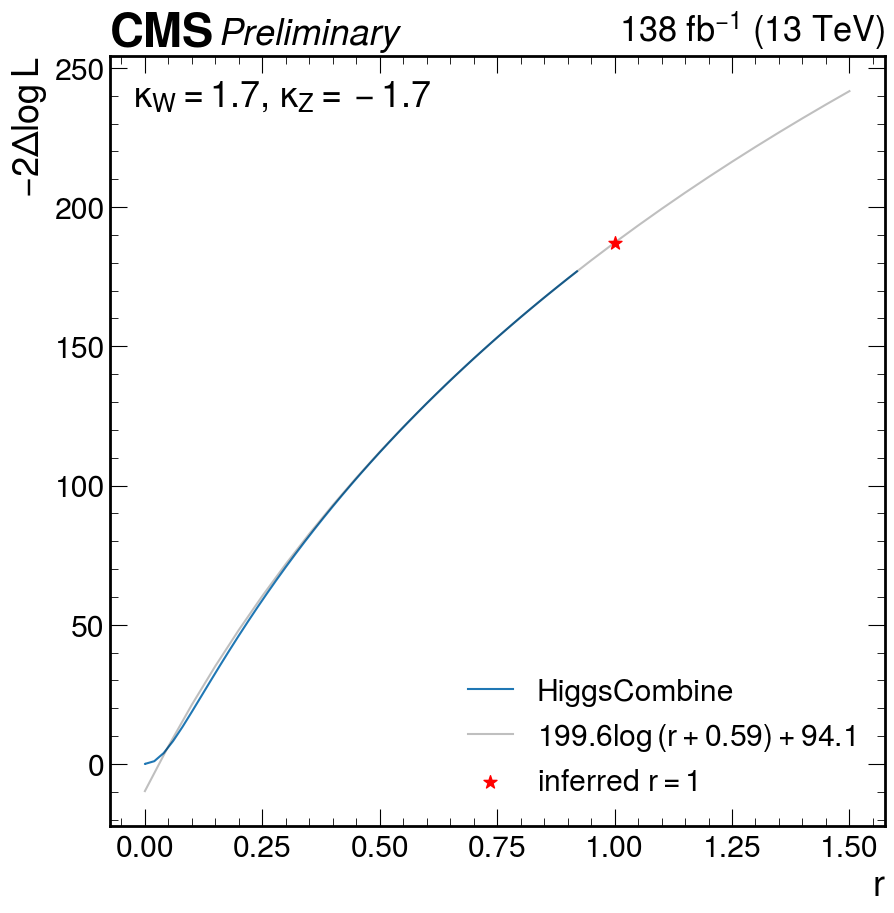

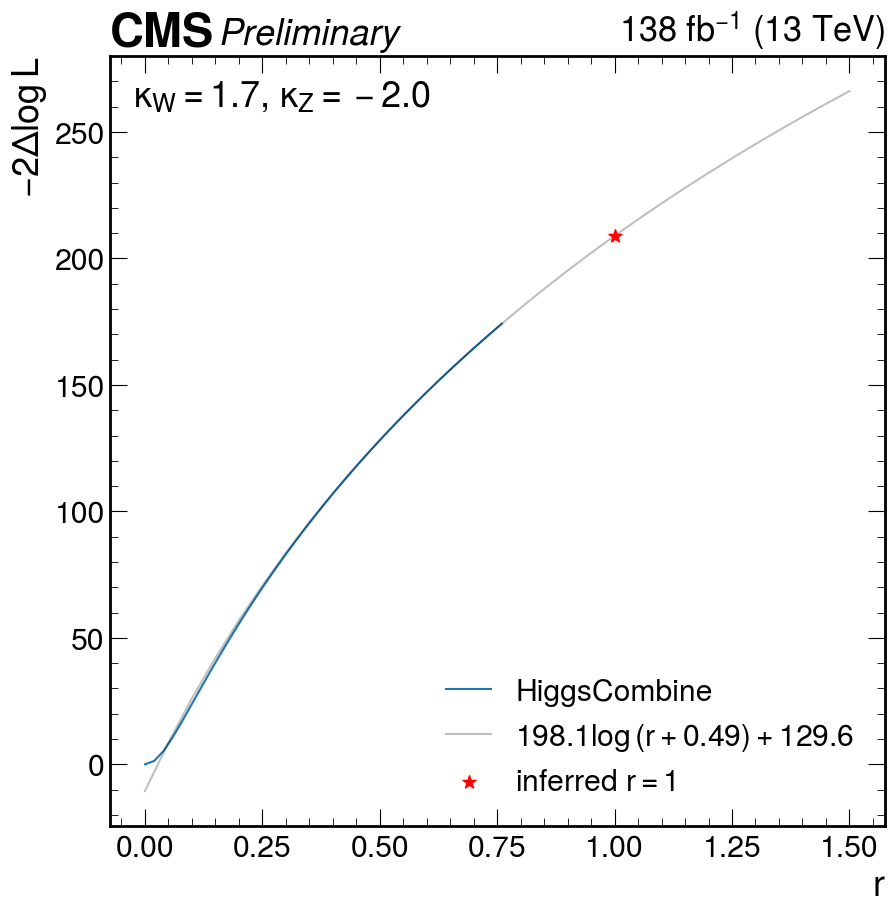

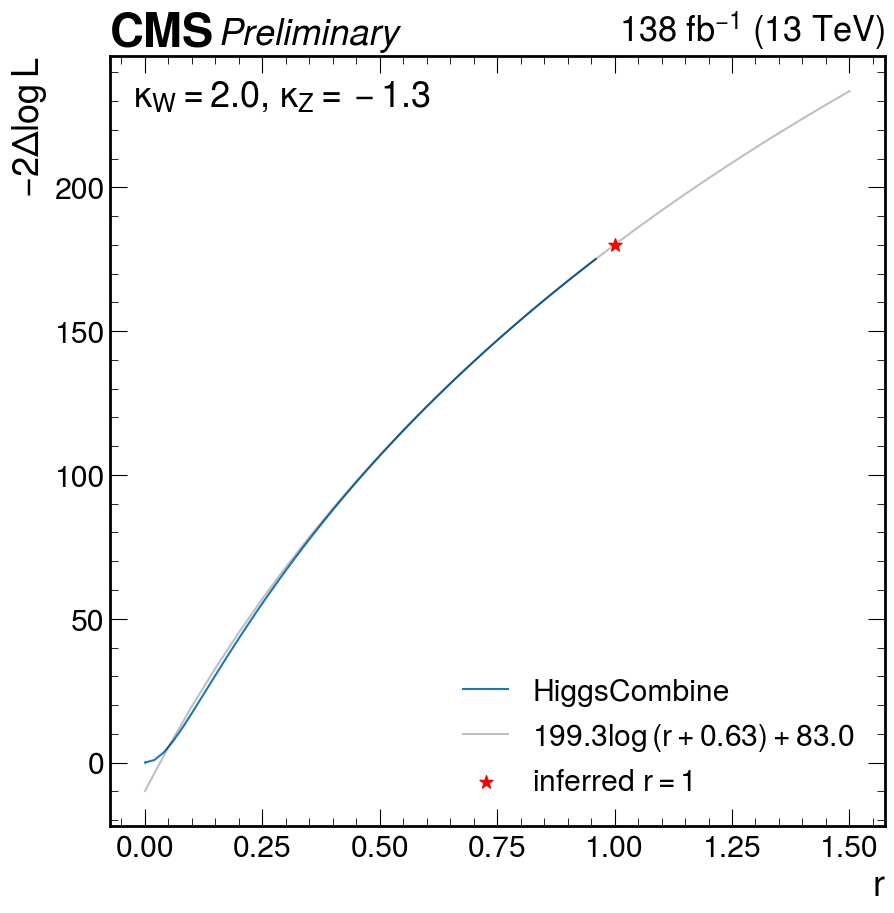

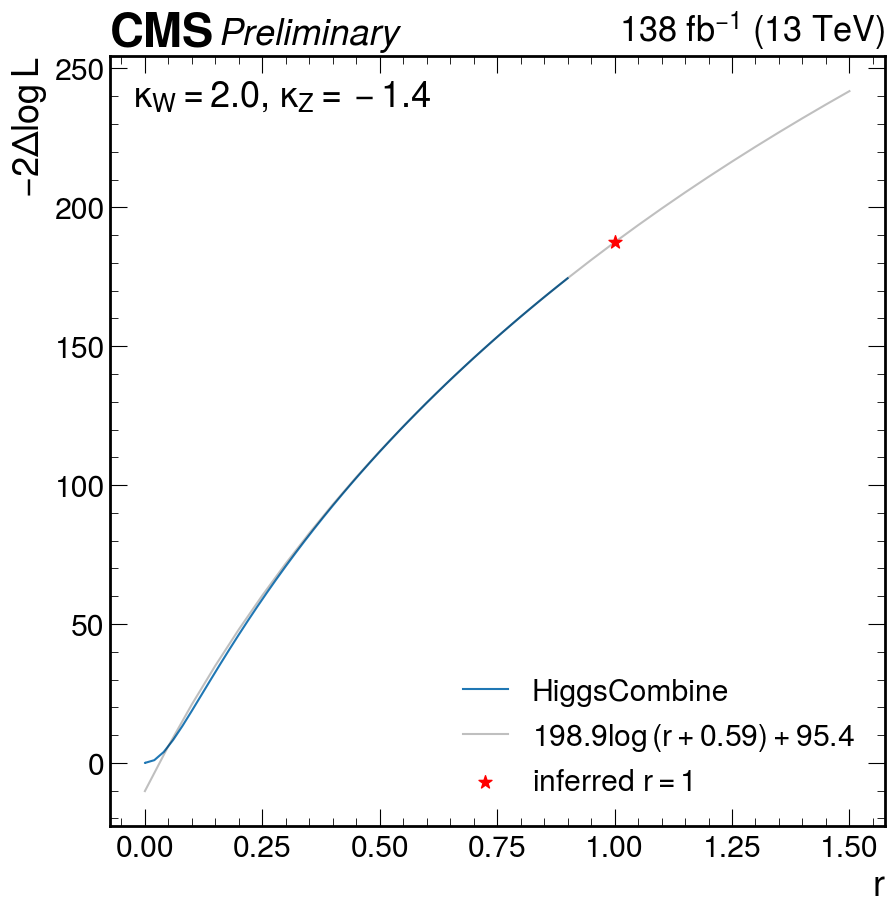

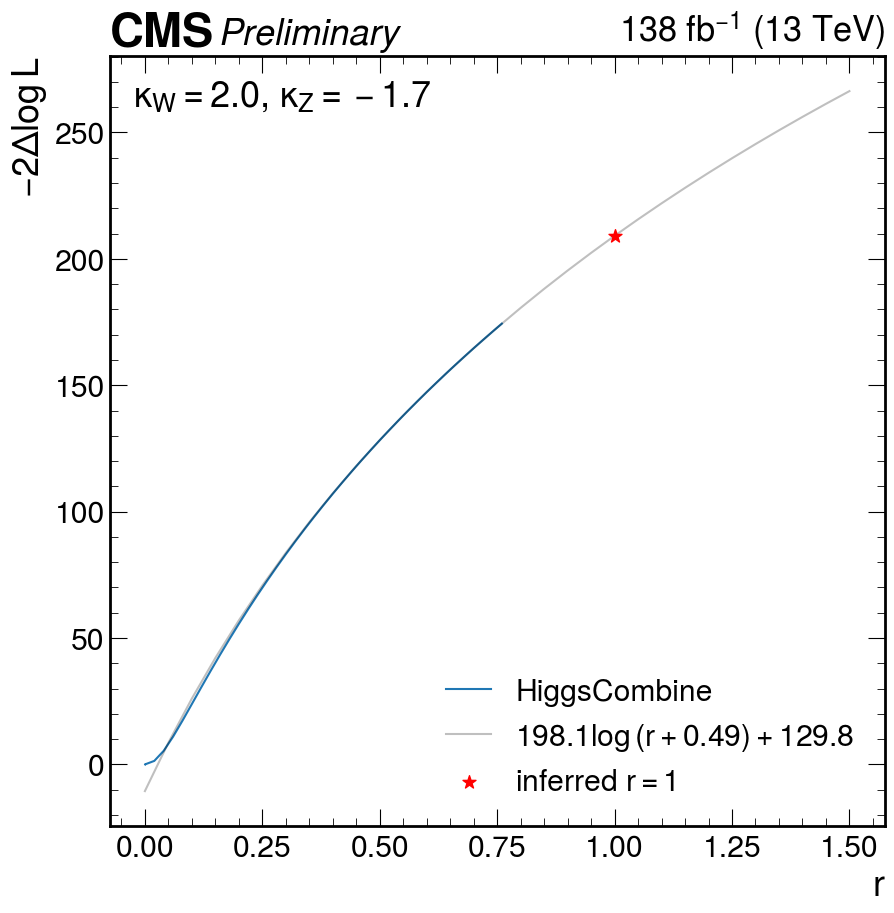

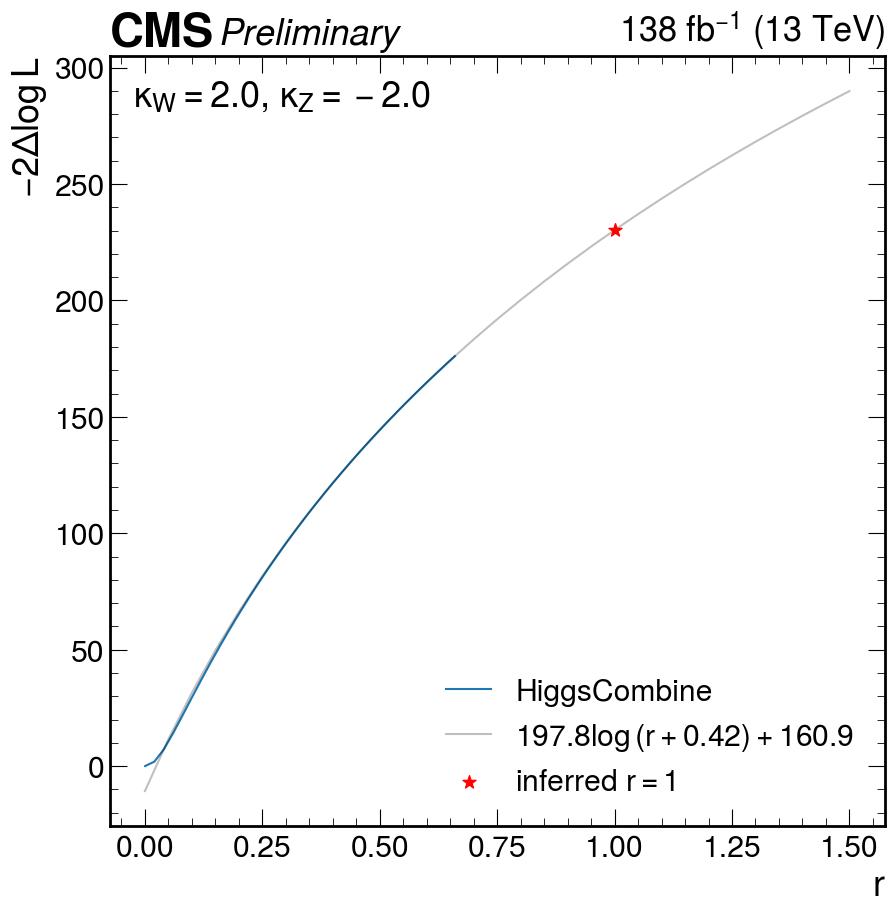

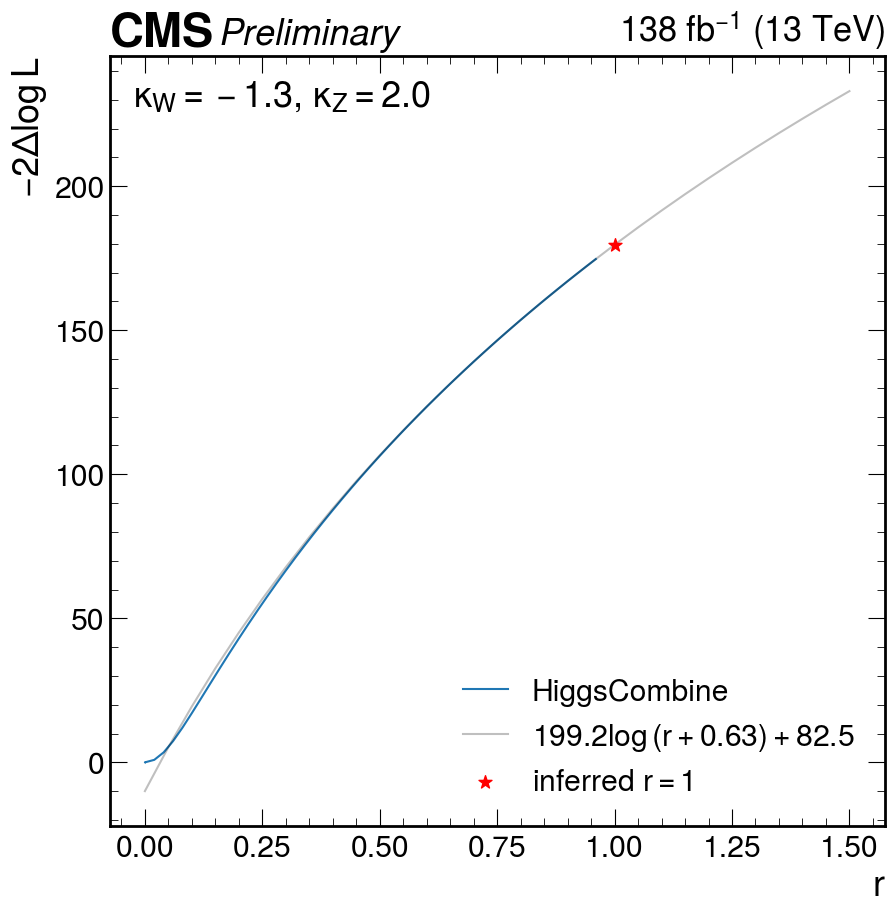

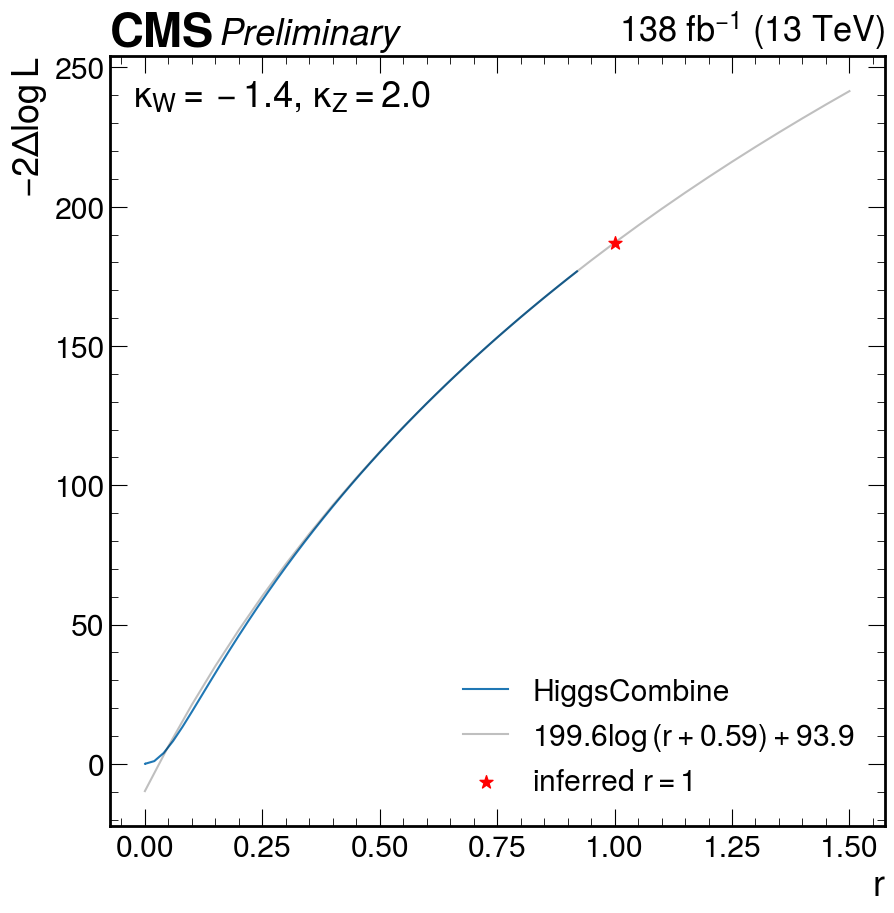

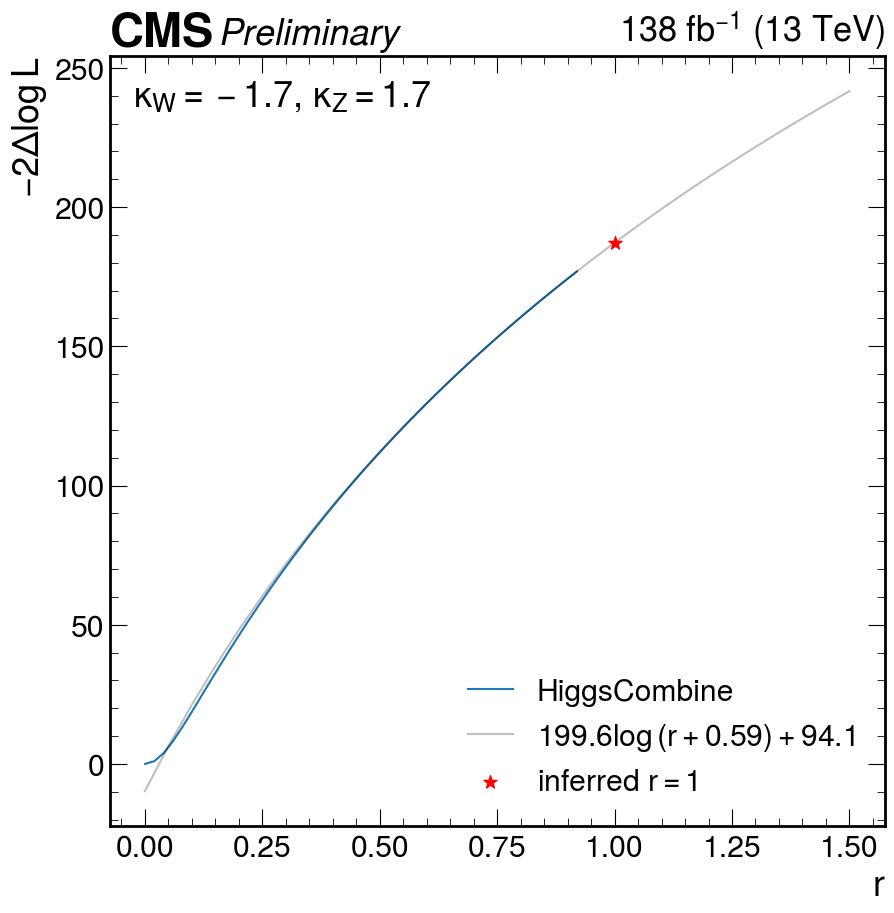

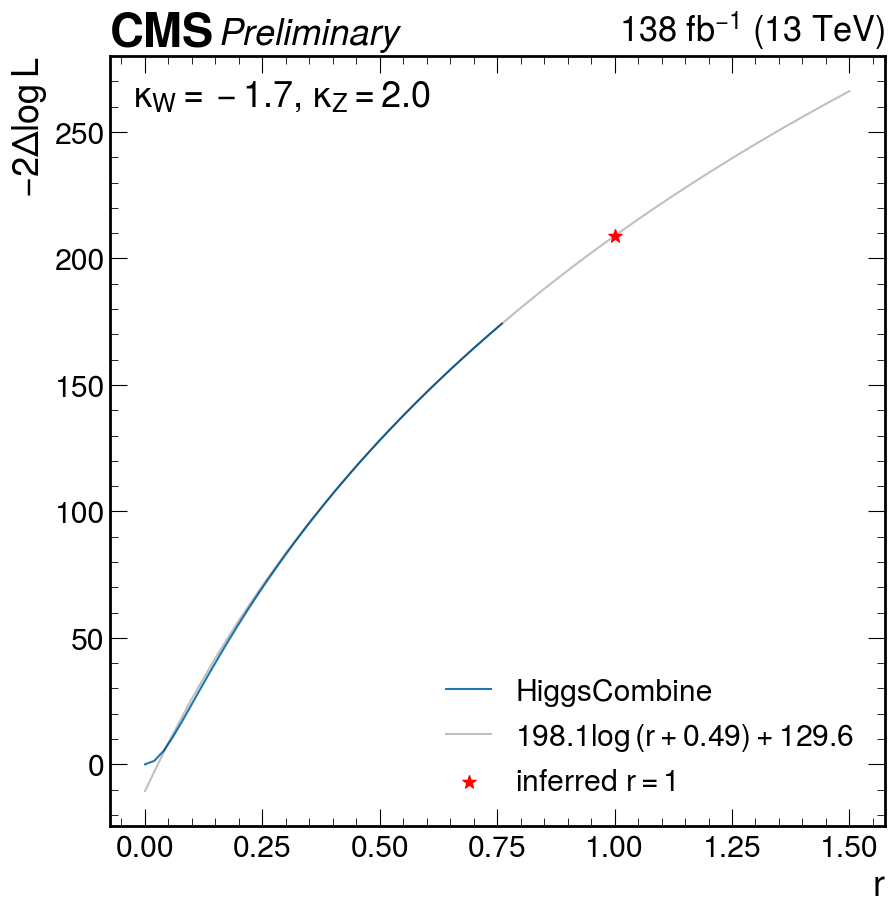

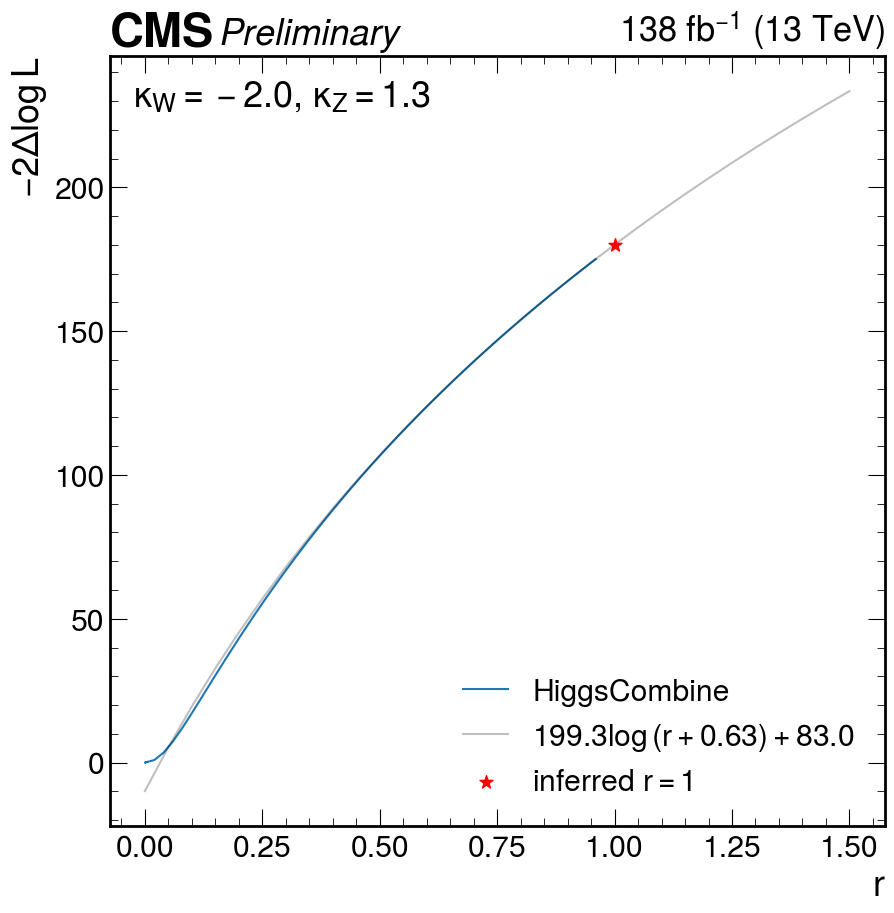

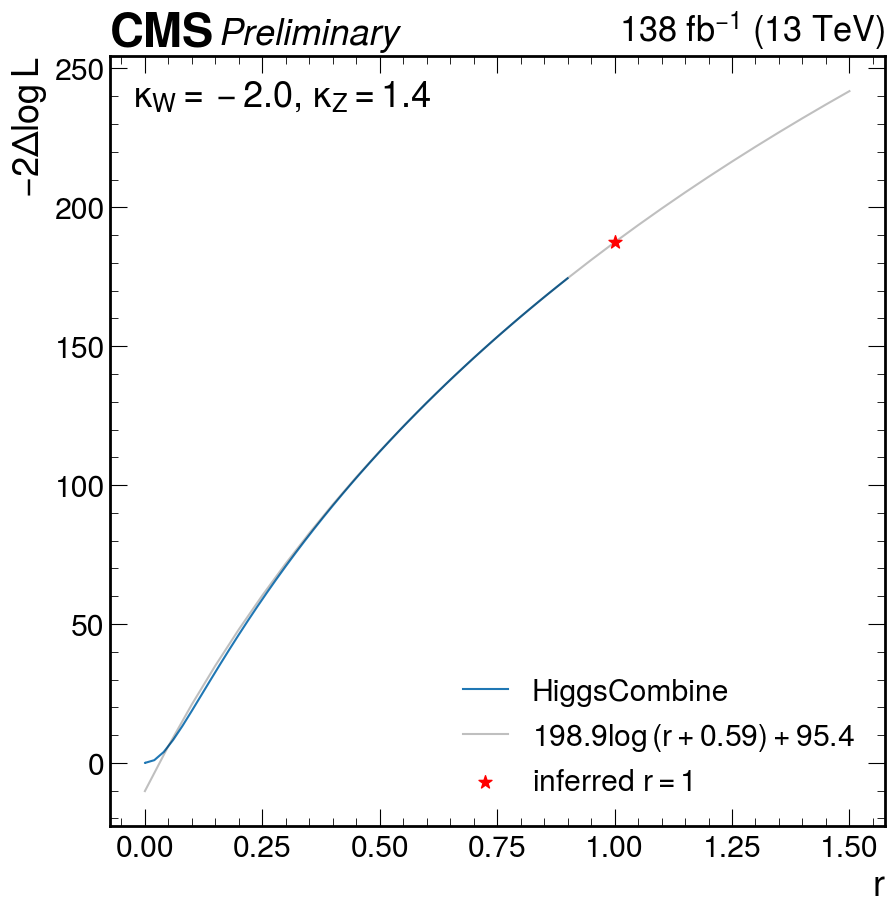

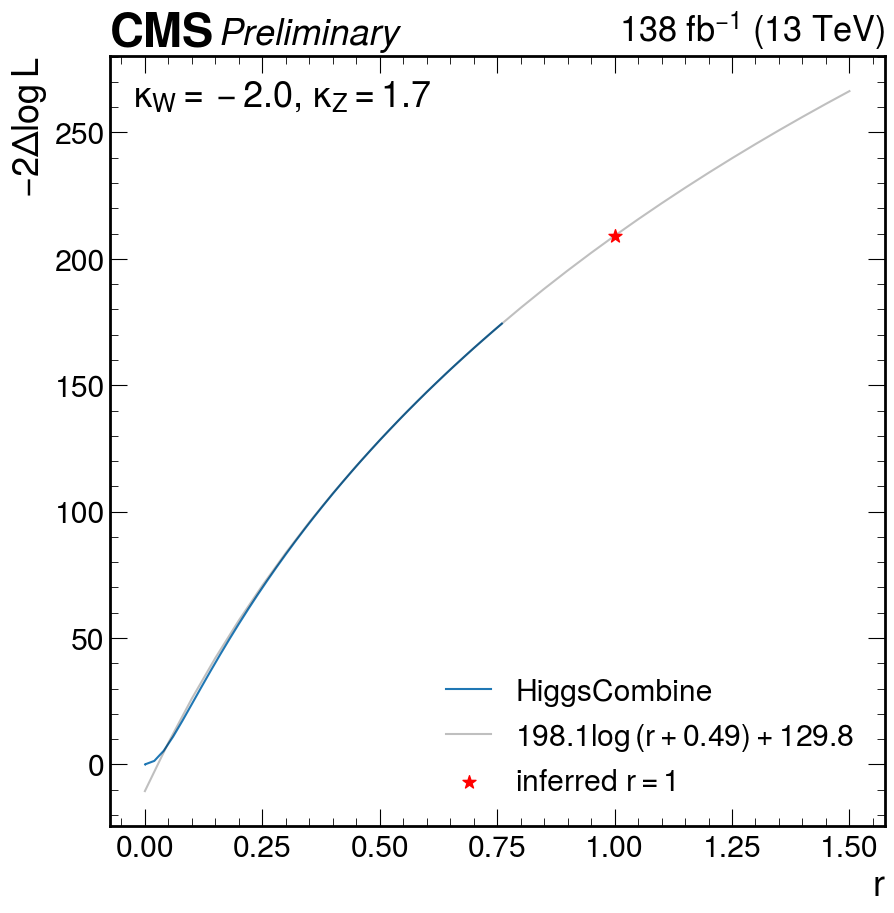

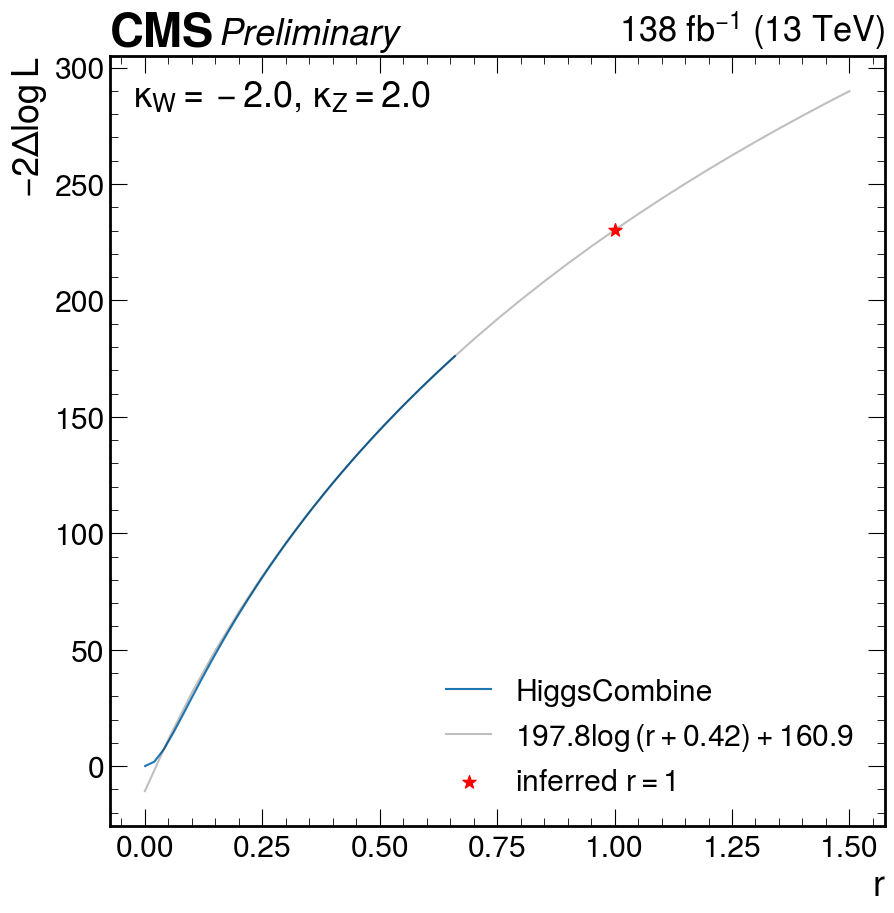

In [5]:
import warnings
warnings.filterwarnings("ignore")
    
if BLIND:
    results = get_2D_results("../combine/vbswh/limits/results/*.root", blind=True)
    r_eq_1_sigmas, kW_points, kZ_points, spec_points = results
    kW_spec_points, kZ_spec_points = spec_points
else:
    results = get_2D_results("../combine/vbswh/limits/results_unblinded/*.root", blind=False)
    results_blind = get_2D_results("../combine/vbswh/limits/results/*.root", blind=False)
    r_eq_1_sigmas, kW_points, kZ_points, spec_points = results
    kW_spec_points, kZ_spec_points = spec_points
    r_eq_1_sigmas_blind, kW_points_blind, kZ_points_blind, spec_points = results_blind

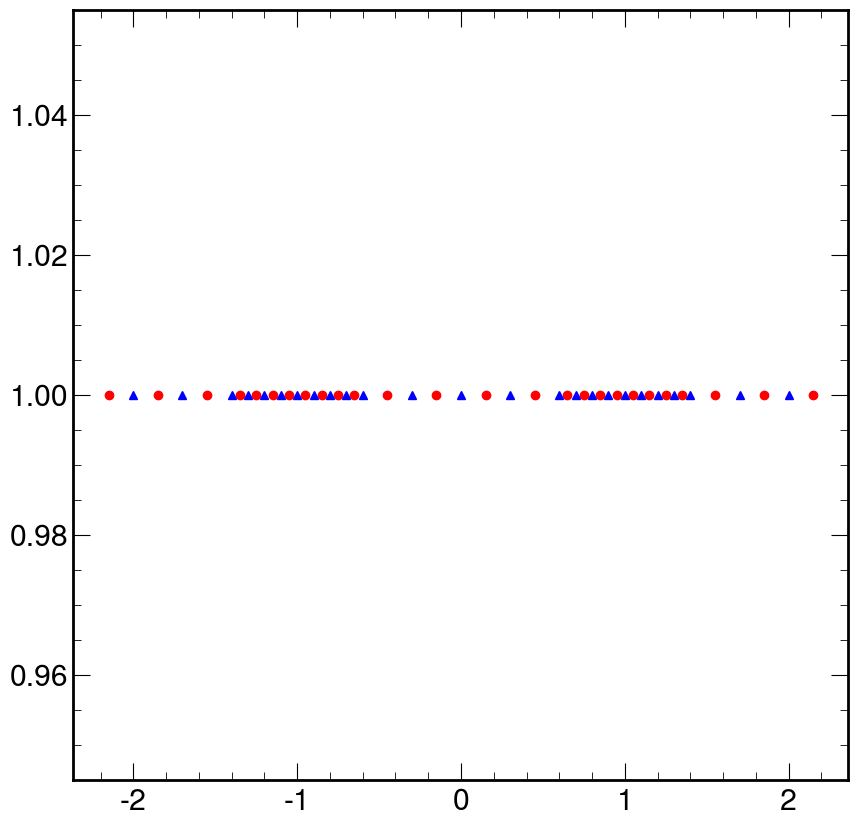

In [6]:
kW_values = np.unique(kW_points)
kW_widths = kW_values[1:] - kW_values[:-1]
kW_bin_edges = np.union1d(
    kW_values[:-1] + 0.5*kW_widths,
    kW_values[1:]  - 0.5*kW_widths,
)
kW_bin_edges = np.concatenate((
    [kW_values[0] - 0.5*kW_widths[0]],
    kW_bin_edges,
    [kW_values[-1] + 0.5*kW_widths[-1]]
))

kZ_values = np.unique(kZ_points)
kZ_widths = kZ_values[1:] - kZ_values[:-1]
kZ_bin_edges = np.union1d(
    kZ_values[:-1] + 0.5*kZ_widths,
    kZ_values[1:]  - 0.5*kZ_widths
)
kZ_bin_edges = np.concatenate((
    [kZ_values[0] - 0.5*kZ_widths[0]],
    kZ_bin_edges,
    [kZ_values[-1] + 0.5*kZ_widths[-1]]
))

fig, axes = plt.subplots()
axes.plot(
    kW_bin_edges, np.ones(kW_bin_edges.shape), "ro"
)
axes.plot(
    kW_values, np.ones(kW_values.shape), "b^"
)

In [7]:
def zero_out_sigmas(sigmas, kW_points, kZ_points, *kWkZ_to_zero, zero_val=0):
    filtered_sigmas = sigmas.copy()
    for kW, kZ in kWkZ_to_zero:
        filtered_sigmas[np.where((kW_points == kW) & (kZ_points == kZ))] = zero_val
        
    return np.array(filtered_sigmas)

In [8]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as clr

cmap = clr.LinearSegmentedColormap.from_list("trident", ["#182B49","#00629B", "#C69214", "#FFCD00"], N=256)

def colorbar(mappable):
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    return fig.colorbar(mappable, cax=cax)

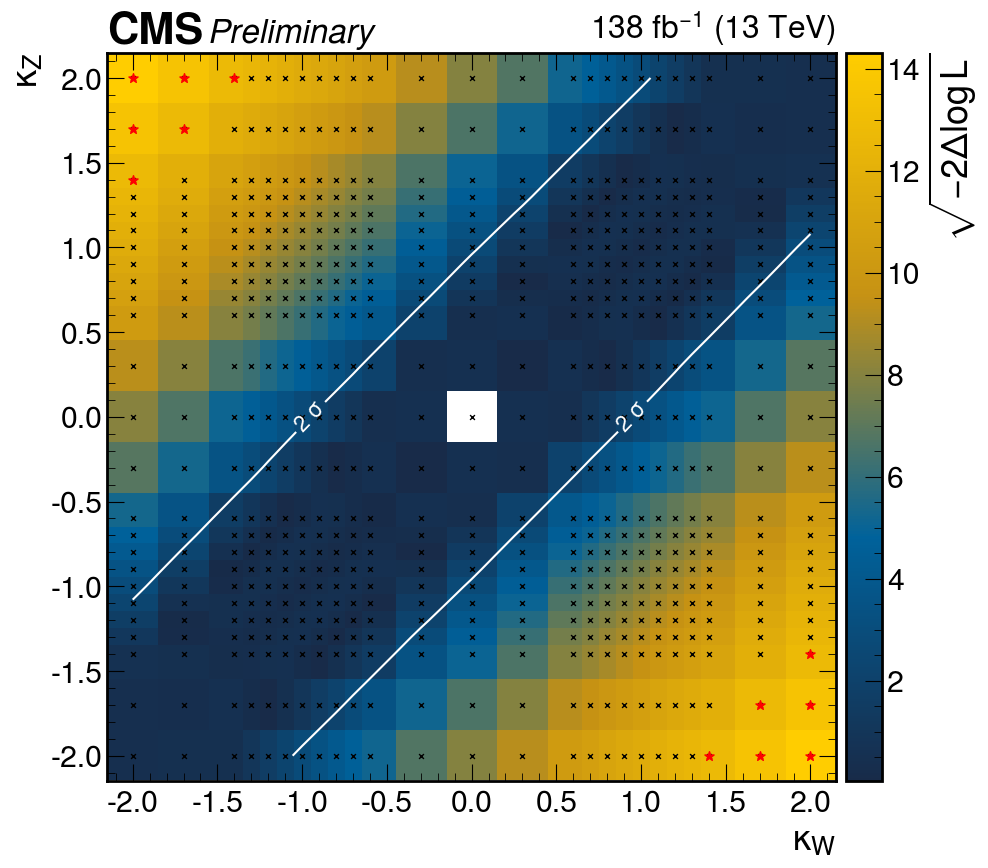

In [9]:
hist2d = yahist.Hist2D(
    (kW_points, kZ_points),
    bins=[kW_bin_edges, kZ_bin_edges],
    weights=zero_out_sigmas(r_eq_1_sigmas, kW_points, kZ_points, (0,0))
)

# Plot 2D hist
fig, axes = plt.subplots()
mpl_objs = hist2d.plot(ax=axes, colorbar=False, cmap=cmap);
# mpl_objs = hist2d.plot(
#     ax=axes, colorbar=False, counts=True, counts_formatter="{:.1f}".format, counts_fontsize=6, cmap=cmap
# );
axes.set_xlabel(r"$\kappa_W$");
axes.set_ylabel(r"$\kappa_Z$");
axes.set_aspect("equal");

# Plot (kW, kZ) points where sigma is taken directly from log-likelihood plot
axes.scatter(kW_points, kZ_points, marker="x", color="k", linewidths=1, s=12)
# Plot (kW, kZ) points where sigma is inferred from log-likelihood plot
axes.scatter(kW_spec_points, kZ_spec_points, marker="*", color="r", s=48)

# Plot colorbar
cbar = colorbar(mpl_objs[0]);
cbar.set_label(r"$\sqrt{-2\Delta\logL}$");

# Plot contour(s)
contours = axes.contour(
    np.unique(kW_points), np.unique(kZ_points), 
    hist2d.counts,
    [np.sqrt(6.18)],
    colors=["white"]
)

# Add CMS label
hep.cms.label(
    "Preliminary",
    data=(not BLIND),
    lumi=138,
    loc=0,
    ax=axes,
    fontsize=24
);

axes.clabel(contours, contours.levels, inline=True, fmt=lambda x: f"{int(x):g}"+r" $\sigma$", fontsize=16);

axes.set_xticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);
axes.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);

if BLIND:
    plt.savefig("/home/users/jguiang/public_html/vbswh_plots/limits/raw_exclusion_2D_alt.pdf", bbox_inches="tight");
else:
    plt.savefig("/home/users/jguiang/public_html/vbswh_plots/limits/raw_exclusion_2D_alt_unblinded.pdf", bbox_inches="tight");

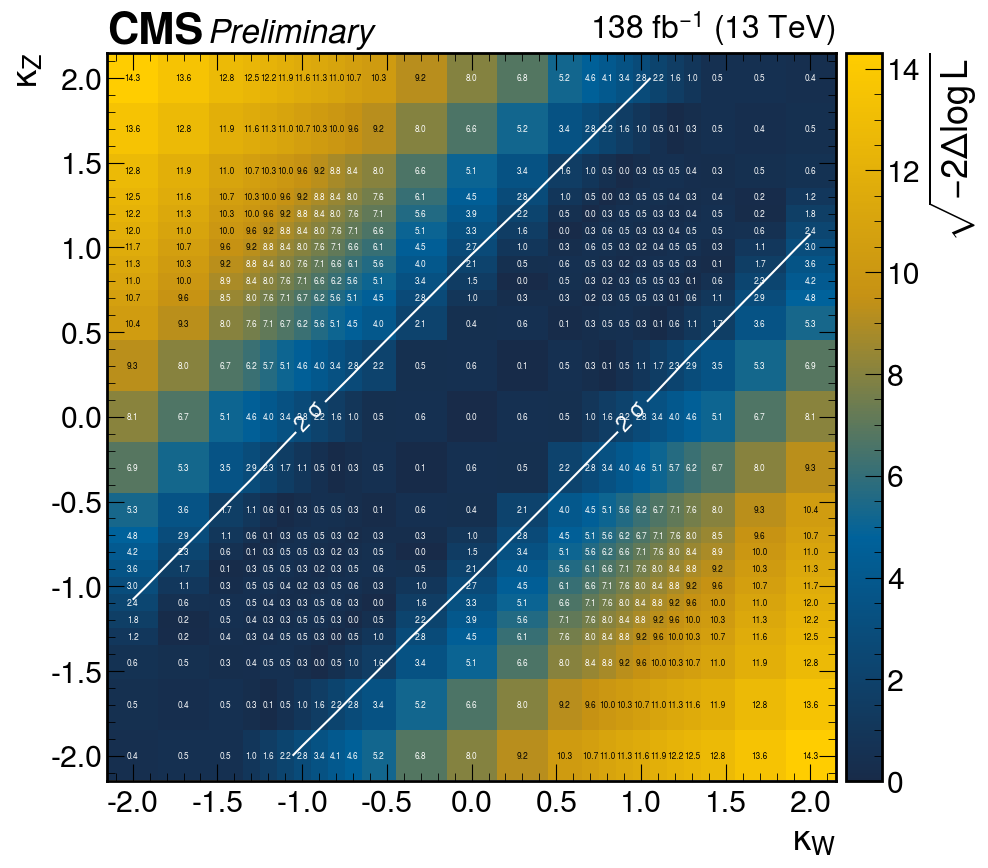

In [10]:
hist2d = yahist.Hist2D(
    (kW_points, kZ_points),
    bins=[kW_bin_edges, kZ_bin_edges],
    weights=zero_out_sigmas(r_eq_1_sigmas, kW_points, kZ_points, (0,0))
)

# Plot 2D hist
fig, axes = plt.subplots()
mpl_objs = hist2d.plot(
    ax=axes, colorbar=False, counts=True, counts_formatter="{:.1f}".format, counts_fontsize=6, cmap=cmap,
    hide_empty=False
);
axes.set_xlabel(r"$\kappa_W$");
axes.set_ylabel(r"$\kappa_Z$");
axes.set_aspect("equal");

# Plot colorbar
cbar = colorbar(mpl_objs[0]);
cbar.set_label(r"$\sqrt{-2\Delta\logL}$");


# Plot contour(s)
contours = axes.contour(
    np.unique(kW_points), np.unique(kZ_points), 
    hist2d.counts,
    [np.sqrt(6.18)],
    colors=["white"]
)

# Add CMS label
hep.cms.label(
    "Preliminary",
    data=(not BLIND),
    lumi=138,
    loc=0,
    ax=axes,
    fontsize=24
);

axes.clabel(contours, contours.levels, inline=True, fmt=lambda x: f"{int(x):g}"+r" $\sigma$", fontsize=16);

axes.set_xticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);
axes.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);

if BLIND:
    plt.savefig("/home/users/jguiang/public_html/vbswh_plots/limits/raw_exclusion_2D.pdf", bbox_inches="tight");
else:
    plt.savefig("/home/users/jguiang/public_html/vbswh_plots/limits/raw_exclusion_2D_unblinded.pdf", bbox_inches="tight");

In [11]:
from matplotlib.patches import Rectangle

def get_limit_rectangle(kW, kW_err, kZ, kZ_err, color="white", hatch="/////"):
    return Rectangle(
        (kW - kW_err, kZ - kZ_err), 
        kW_err*2, kZ_err*2,
        edgecolor=color,
        facecolor="None",
        hatch=hatch
    )

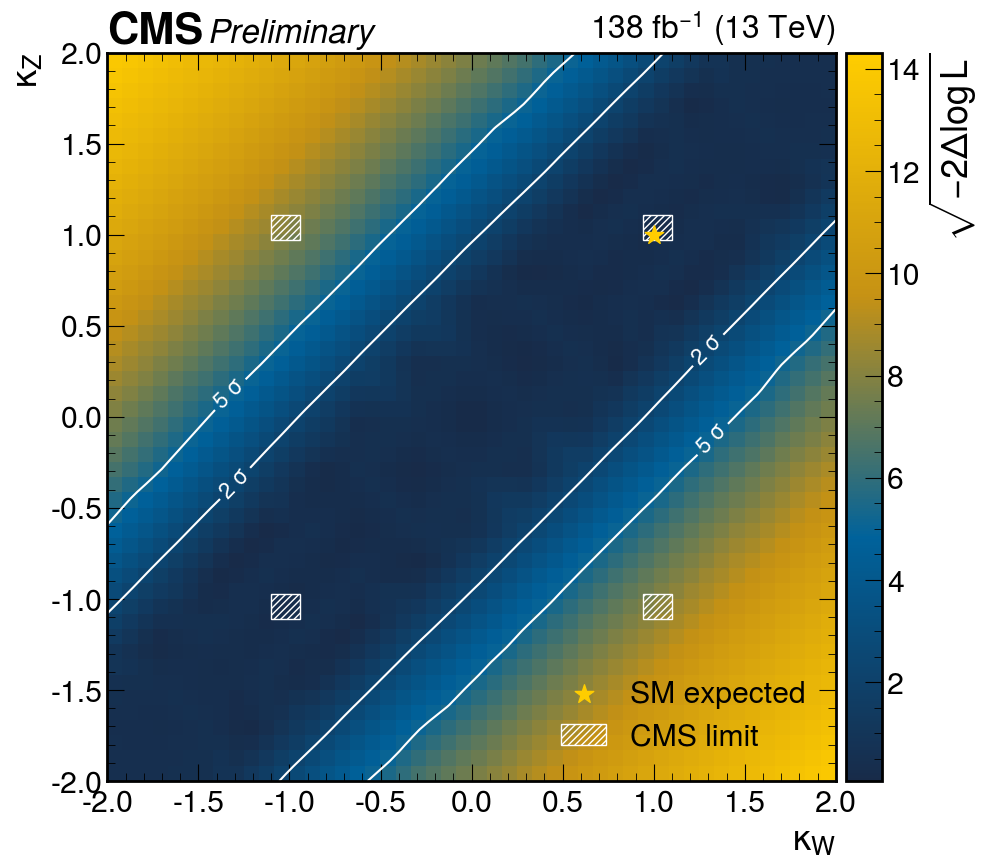

In [12]:
from scipy.interpolate import griddata
from scipy.interpolate import RegularGridInterpolator

kmin = -2
kmax = 2
kpnts = 50

grid_x, grid_y = np.mgrid[-2:2:kpnts*1j, -2:2:kpnts*1j]
test = griddata(
    (kW_points, kZ_points), 
    zero_out_sigmas(r_eq_1_sigmas, kW_points, kZ_points, (0,0)), 
    (grid_x, grid_y), 
    method="linear",
    rescale=True
)

kW_fine = np.tile(
    np.linspace(kmin, kmax, kpnts), (kpnts, 1)
).T.flatten()
kZ_fine = np.tile(
    np.linspace(kmin, kmax, kpnts), (kpnts, 1)
).flatten()

kW_bin_edges_fine = np.linspace(-2 - (kmax - kmin)/(kpnts - 1), 2 + (kmax - kmin)/(kpnts - 1), kpnts+1)
kZ_bin_edges_fine = np.linspace(-2 - (kmax - kmin)/(kpnts - 1), 2 + (kmax - kmin)/(kpnts - 1), kpnts+1)

hist2d = yahist.Hist2D(
    (grid_x.flatten(), grid_y.flatten()),
    bins=[kW_bin_edges_fine, kZ_bin_edges_fine],
    weights=test.flatten()
)

# Plot 2D hist
fig, axes = plt.subplots()
mpl_objs = hist2d.plot(ax=axes, colorbar=False, cmap=cmap);
# mpl_objs = hist2d.plot(ax=axes, colorbar=False, counts=True, counts_formatter="{:.1f}".format, counts_fontsize=6);
axes.set_xlabel(r"$\kappa_W$");
axes.set_ylabel(r"$\kappa_Z$");
axes.set_aspect("equal");

# Plot colorbar
cbar = colorbar(mpl_objs[0]);
cbar.set_label(r"$\sqrt{-2\Delta\logL}$");

# Add CMS label
hep.cms.label(
    "Preliminary",
    data=(not BLIND),
    lumi=138,
    loc=0,
    ax=axes,
    fontsize=24
);

# Plot contour(s)
contours = axes.contour(
    np.unique(grid_x.flatten()), np.unique(grid_y.flatten()), 
    hist2d.counts,
    [np.sqrt(6.18), np.sqrt(28.7)],
    colors=["white"]
)

# axes.errorbar(1.0, 1.04, yerr=0.07, capsize=3, color="white", ls="none");
# axes.errorbar(1.02, 1.0, xerr=0.08, capsize=3, color="white", ls="none", label="Current limit");
axes.scatter(1.0, 1.0, zorder=100, s=196, color="#FFCD00", marker="*", label="SM expected");

# axes.errorbar(-1.0, 1.04, yerr=0.07, capsize=3, color="white", ls="none");
# axes.errorbar(-1.02, 1.0, xerr=0.08, capsize=3, color="white", ls="none");


# axes.errorbar(1.0, -1.04, yerr=0.07, capsize=3, color="white", ls="none");
# axes.errorbar(1.02, -1.0, xerr=0.08, capsize=3, color="white", ls="none");

# axes.errorbar(-1.0, -1.04, yerr=0.07, capsize=3, color="white", ls="none");
# axes.errorbar(-1.02, -1.0, xerr=0.08, capsize=3, color="white", ls="none");

rectangle = axes.add_patch(get_limit_rectangle(1.02, 0.08, 1.04, 0.07, color="white"))
axes.add_patch(get_limit_rectangle(-1.02, 0.08, 1.04, 0.07, color="white"))
axes.add_patch(get_limit_rectangle(1.02, 0.08, -1.04, 0.07, color="white"))
axes.add_patch(get_limit_rectangle(-1.02, 0.08, -1.04, 0.07, color="white"))
rectangle.set_label("CMS limit")

axes.clabel(contours, contours.levels, inline=True, fmt=lambda x: f"{int(x):g}"+r" $\sigma$", fontsize=16);
axes.legend(loc="lower right");

axes.set_ylim([-2, 2])
axes.set_xlim([-2, 2])

axes.set_xticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);
axes.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);

if BLIND:
    plt.savefig("/home/users/jguiang/public_html/vbswh_plots/limits/exclusion_2D.pdf", bbox_inches="tight");
else:
    plt.savefig("/home/users/jguiang/public_html/vbswh_plots/limits/exclusion_2D_unblinded.pdf", bbox_inches="tight");

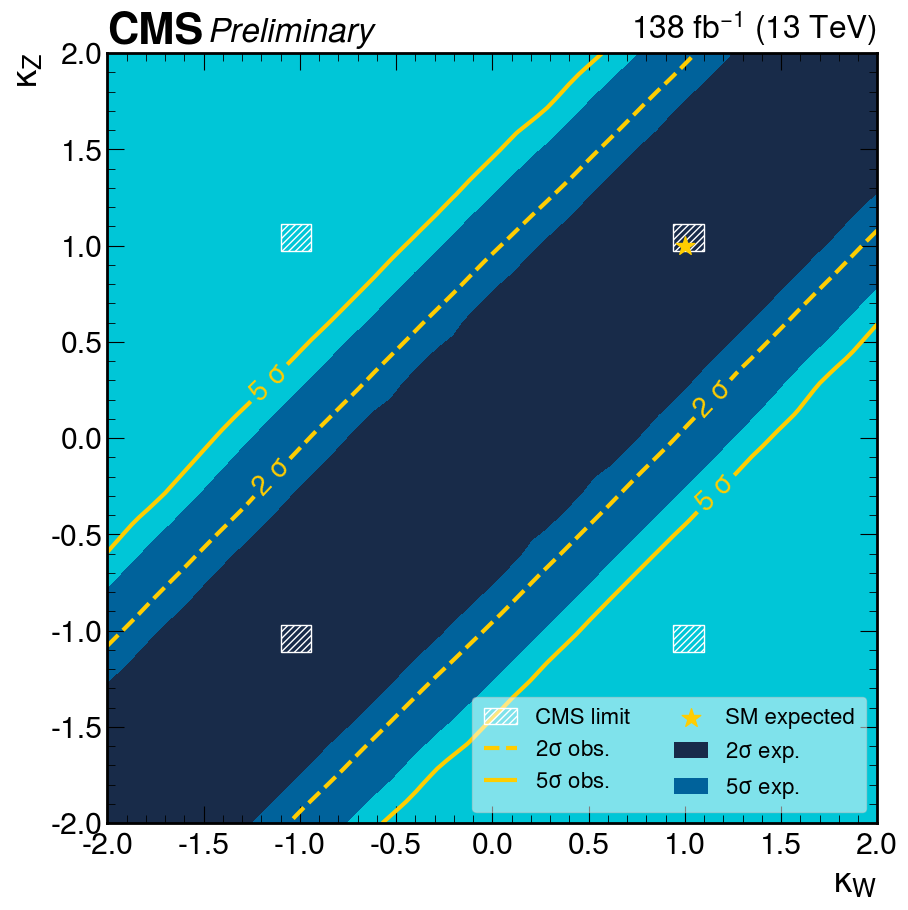

In [13]:
if not BLIND:
    from scipy.interpolate import griddata
    from scipy.interpolate import RegularGridInterpolator

    trident_colors = {
        "navy": "#182B49",
        "blue": "#00629B", 
        "gold": "#C69214", 
        "yellow": "#FFCD00", 
        "cyan": "#00C6D7", 
        "sand": "#F5F0E6"
    }

    kmin = -2
    kmax = 2
    kpnts = 50

    # Set up figure
    fig, axes = plt.subplots()
    axes.set_xlabel(r"$\kappa_W$");
    axes.set_ylabel(r"$\kappa_Z$");
    axes.set_aspect("equal");

    # Add CMS label
    hep.cms.label(
        "Preliminary",
        data=(not BLIND),
        lumi=138,
        loc=0,
        ax=axes,
        fontsize=24
    );

    extra_handles = []
    extra_labels = []

    # ----------- START: UNBLINDED -----------
    grid_x, grid_y = np.mgrid[-2:2:kpnts*1j, -2:2:kpnts*1j]
    test = griddata(
        (kW_points, kZ_points), 
        zero_out_sigmas(r_eq_1_sigmas, kW_points, kZ_points, (0,0)), 
        (grid_x, grid_y), 
        method="linear",
        rescale=True
    )

    kW_fine = np.tile(
        np.linspace(kmin, kmax, kpnts), (kpnts, 1)
    ).T.flatten()
    kZ_fine = np.tile(
        np.linspace(kmin, kmax, kpnts), (kpnts, 1)
    ).flatten()

    kW_bin_edges_fine = np.linspace(-2 - (kmax - kmin)/(kpnts - 1), 2 + (kmax - kmin)/(kpnts - 1), kpnts+1)
    kZ_bin_edges_fine = np.linspace(-2 - (kmax - kmin)/(kpnts - 1), 2 + (kmax - kmin)/(kpnts - 1), kpnts+1)

    hist2d = yahist.Hist2D(
        (grid_x.flatten(), grid_y.flatten()),
        bins=[kW_bin_edges_fine, kZ_bin_edges_fine],
        weights=test.flatten()
    )

    # Plot contour(s)
    contours = axes.contour(
        np.unique(grid_x.flatten()), np.unique(grid_y.flatten()), 
        hist2d.counts,
        [np.sqrt(6.18), np.sqrt(28.7)],
        colors=[trident_colors["yellow"]],
        linewidths=3,
        linestyles=["--", "-"]
    )
    _handles, _ = contours.legend_elements()
    extra_handles += _handles
    extra_labels += [r"$2\sigma$ obs.", r"$5\sigma$ obs."]
    axes.clabel(contours, contours.levels, inline=True, fmt=lambda x: f"{int(x):g}"+r" $\sigma$", fontsize=20);
    # ----------- END: UNBLINDED -----------

    # ----------- START: BLINDED -----------
    grid_x, grid_y = np.mgrid[-2:2:kpnts*1j, -2:2:kpnts*1j]
    test = griddata(
        (kW_points_blind, kZ_points_blind), 
        zero_out_sigmas(r_eq_1_sigmas_blind, kW_points_blind, kZ_points_blind, (0,0)), 
        (grid_x, grid_y), 
        method="linear",
        rescale=True
    )

    hist2d = yahist.Hist2D(
        (grid_x.flatten(), grid_y.flatten()),
        bins=[kW_bin_edges_fine, kZ_bin_edges_fine],
        weights=test.flatten()
    )

    # Plot contour(s)
    contours = axes.contourf(
        np.unique(grid_x.flatten()), np.unique(grid_y.flatten()), 
        hist2d.counts,
        [0, np.sqrt(6.18)],
        colors=[trident_colors["navy"]]
    )
    _handles, _ = contours.legend_elements()
    extra_handles += _handles
    extra_labels += [r"$2\sigma$ exp."]

    contours = axes.contourf(
        np.unique(grid_x.flatten()), np.unique(grid_y.flatten()), 
        hist2d.counts,
        [np.sqrt(6.18), np.sqrt(28.7)],
        colors=[trident_colors["blue"]]
    )
    _handles, _ = contours.legend_elements()
    extra_handles += _handles
    extra_labels += [r"$5\sigma$ exp."]
    # ----------- END: BLINDED -----------

    axes.set_xticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);
    axes.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);

    axes.set_facecolor(trident_colors["cyan"])

    rectangle = axes.add_patch(get_limit_rectangle(1.02, 0.08, 1.04, 0.07, color="white"))
    axes.add_patch(get_limit_rectangle(-1.02, 0.08, 1.04, 0.07, color="white"))
    axes.add_patch(get_limit_rectangle(1.02, 0.08, -1.04, 0.07, color="white"))
    axes.add_patch(get_limit_rectangle(-1.02, 0.08, -1.04, 0.07, color="white"))
    rectangle.set_label("CMS limit")

    axes.scatter(1.0, 1.0, zorder=100, s=196, color=trident_colors["yellow"], marker="*", label="SM expected");

    legend = axes.legend(
        loc="lower right",
        frameon=True,
        facecolor="white", 
        framealpha=0.5,
        fontsize=16,
        ncol=2
    );

    handles, labels = axes.get_legend_handles_labels()

    for handle_i, handle in enumerate(extra_handles):
        handles.append(handle)
        labels.append(extra_labels[handle_i])

    kW1_kZ1_handle = handles.pop(1)
    kW1_kZ1_label = labels.pop(1)

    handles.insert(3, kW1_kZ1_handle)
    labels.insert(3, kW1_kZ1_label)

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())

    plt.savefig(
        "/home/users/jguiang/public_html/vbswh_plots/limits/exclusion_countours_2D_unblinded.pdf", 
        bbox_inches="tight"
    );

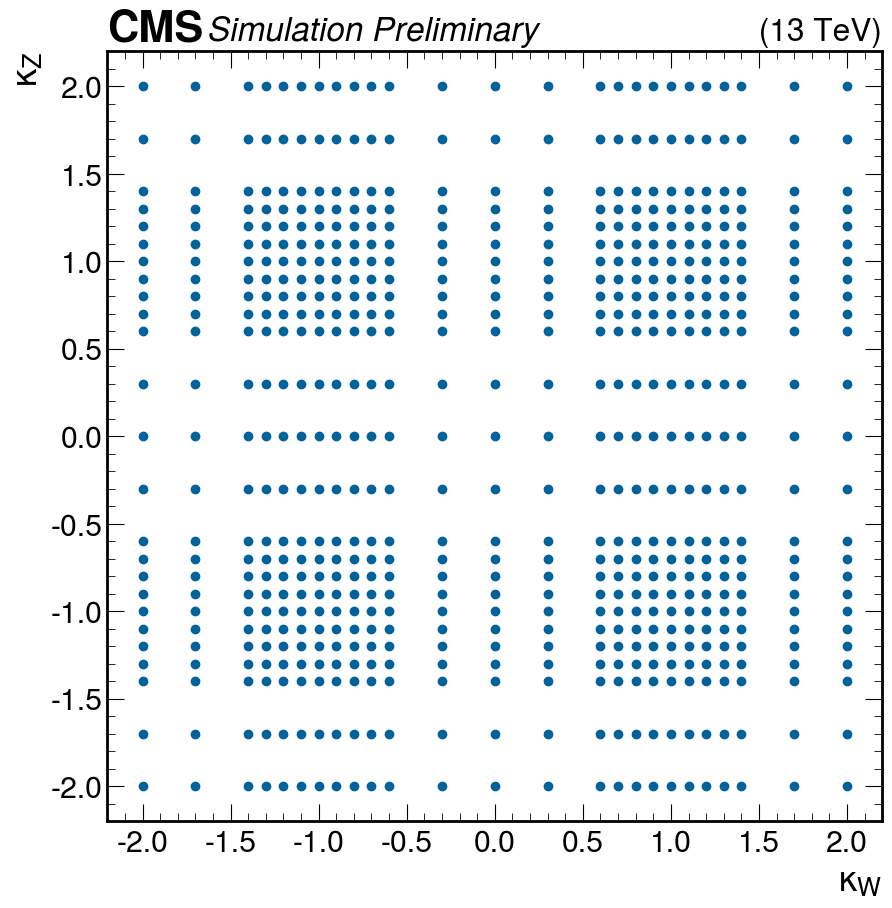

In [14]:
all_neg = kW_points*kZ_points <= 0
all_pos = kW_points*kZ_points > 0

fig, axes = plt.subplots()
# axes.scatter(
#     kW_points[all_neg], kZ_points[all_neg], marker="o", color="#00629B"
# )
# axes.scatter(
#     kW_points[all_pos], kZ_points[all_pos], marker="^", color="#C69214"
# )
axes.scatter(
    kW_points, kZ_points, marker="o", color="#00629B"
)

# Add CMS label
hep.cms.label(
    "Preliminary",
    data=False,
    loc=0,
    ax=axes,
    fontsize=24
);

axes.set_xticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);
axes.set_yticks([-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0]);
axes.set_xlabel(r"$\kappa_W$");
axes.set_ylabel(r"$\kappa_Z$");

plt.savefig("/home/users/jguiang/public_html/vbswh_plots/reweighting/scanned_kWkZ.pdf", bbox_inches="tight");